**– IBM Capsotone Project Report –**


# Egg-breakfast place in Paris

**Author:** Lara Simonova, Information architect  
**Date:** 27.03.2020

### Table of contents  <br>
<dl>
<dt><a href="#item1">1. Abstract [under construction]</a> 
<dt><a href="#item2">2. Detailed contents</a></dt>
   <dd> <a href="#item2">2.1. Introduction</a></dd>
   <dd><a href="#item3">2.2. Methodology and Data</a></dd>
   <dd><a href="#item4">2.3. Analysis</a></dd> 
   <dd><a href="#item5">2.4. Results and Discussion</a></dd>
   <dd><a href="#item6">2.5. Conclusion </a>     
<dt><a href="#item7">3. References</a>

<a id="item1"></a>

# 1. Abstract [under construction]

<a id="item2"></a>

# 2. Detailed contents

### 2.1. Introduction

**Setting problem**   
Paris has a lot of great local restaurants but the majority of them seem to start serving proper food starting from noon weekdays or on the weekends. During the weekday morning you can grab only a croissant and a shot of coffee. Even though such diet fits locals, tourists might want to have something more substantial for their breakfast. For example **eggs**!

**Question**  
So the question is whether there is a niche for a new everyday egg-breakfasting place in Paris?  
The answer will help a restorator to decide whether it is reasonable to open such a place and, if yes, where it should be located.

**Goal**  
To find a best locations for an egg-breakfasting place in Paris in case there is such a nieche    

**Sources review**  
Brief googling shows that there are some places serving Eggs in Paris
1. [The 15 Best Places for Eggs in Paris](https://foursquare.com/top-places/paris/best-places-eggs) by Foursquare
2. Some are mentioned in [The Best Breakfasts in Paris (Beyond Croissants and Café)](https://www.vogue.com/article/best-breakfasts-in-paris-healthy) article im Vogue
3. And there are also 3 places on [Google maps](https://www.google.com/maps/search/egg+breakfast+paris/@48.8699964,2.3239189,14z/data=!3m1!4b1) resulting from "egg breakfast paris" query

So, it seems that there are some egg-breakfasting options already in place. To decide whether there would be a niche for another one and where, we should investigate those in detail.  

<a id="item3"></a>

### 2.2. Methodology and Data section

**Initial questions**    
1. How many egg places are there in Paris? 
2. What is the % of such places among other breakfasting places?
3. Do visitors love those places? 
4. Where those places are located?
5. What are other places nearby which might be also points of attraction of people loving egg-breakfasts?
6. Are there any other locations in the city with same characteristics (= other places in neighborhood) for yet another egg-breakfasting place?  

(during the research some other questions might appear though)

**Methodology**  
Based on definition of the problem the research scenario would be following:

1. Get places serving egg-breakfasts, all types of breakfasts and total number of food points in Paris, calculate their relative percentage.     
2. Retreive and analyze information about egg places:
  1. Their addresses
  2. Their ratings
  3. Categories of other nearby places (up to 30 places within 200 meters radius)
3. Cluster egg places according their neighborhood by k-means clustering method. This includes some preliminary research to define an optimal number of clusters.
4. Set coordinates grid over Paris 
5. Check, whether each point of the grid falls within one of those clusters. This would be done by:
  1. Calculating the euclidean distances from each data point to closest cluster center
  2. Drawing the distribution of such distances
  3. Selecting the exact distance to each cluster center as a cutoff value for a point being attributed to this cluster (other points would be outliers)
6. Among those points of the grid which do belong to one of clusters select best ones to open a new egg place. Best fit would be defined by:  
  1. their proximity to city center (3 km from Louvre)
  2. absense of other egg-places nearby within 300 meters (since Paris is a very dense city, this distance should be fine)

**Data sources and data collection**   

A. For this research **Forsquare** would be the main source of data about breakfasting places and their locations since 
* foursquare dataset is the most comprehensive and accurate so far
* creating a developer account to use API is quite straightforward and the easiest compared to other providers

The data would be fetched by [Foursquare API](https://developer.foursquare.com/docs/api/venues/listed).  
Following data would be used:
1. Venue details including
    * Venue title 
    * Venue categories – to distinguis egg-breakfasting / regular breakfasting places / other points of attraction
    * Venue location – to examine the distribution of places on city map
    * Venue Rating – to understand how popular the place is
2. Similar venues – to maximize number of egg-places
3. Tips details including
    * Text – to examine in detail user feedback and to do an additonal check whether place is serving eggs 
    * Language
    * User

B. Another data source for Paris neighborhoods (arrondissements) coordinates would be **[Paris Open Data](https://opendata.paris.fr/explore/dataset/arrondissements/table/)** 

C. To set up the grid **[epsg.io](https://epsg.io/)** will be used

### 2.2.A Retrieving data on full set of Breakfasting Places in Paris

In [ ]:
# since Forsquare has its limits on queries, I use several accounts to get the data i need

CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180604'

CLIENT_ID_2 = '' # your Foursquare ID
CLIENT_SECRET_2 = '' # your Foursquare Secret

CLIENT_ID_3 = '' # your Foursquare ID
CLIENT_SECRET_3 = '' # your Foursquare Secret

CLIENT_ID_4 = '' # your Foursquare ID
CLIENT_SECRET_4 = '' # your Foursquare Secret

CLIENT_ID_5 = '' # your Foursquare ID
CLIENT_SECRET_5 = '' # your Foursquare Secret

CLIENT_ID_6 = '' # your Foursquare ID
CLIENT_SECRET_6 = 'ZGIX0UWTZVM3KFCUIFBCTWGCXOUCHXXDQOZX5VBGORZVOYQK' # your Foursquare Secret

CLIENT_ID_7 = '' # your Foursquare ID
CLIENT_SECRET_7 = '' # your Foursquare Secret

LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [889]:
import pandas as pd # to work with dataframes
import requests # library to handle requests
from pandas.io.json import json_normalize # tranforming json file into a pandas dataframe library

In [914]:
# Get all breakfast spots in Paris

category = '4bf58dd8d48988d143941735' # breakfast spot category
near = 'Paris,France' 

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&v={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, near, VERSION, category)

# Send the GET Request and examine the results
results = requests.get(url).json()

# return a dataframe
breakfast_spots = results['response']['venues']
breakfast_spots_df = json_normalize(breakfast_spots)
print(breakfast_spots_df.shape)
breakfast_spots_df

(30, 17)


categories  \
0   [{'id': '4bf58dd8d48988d1dc931735', 'name': 'Tea Room', 'pluralName': 'Tea Rooms', 'shortName': 'Tea Room', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tearoom_', 'suffix': '.png'}, 'primary': True}]                      
1   [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}, 'primary': True}]                            
2   [{'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 'Breakfast Spots', 'shortName': 'Breakfast', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}, 'primary': True}]       
3   [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}, 'primary': True}]                            
4   [{'id': '4bf58dd8d48988d10c941735', 'name': 'French Restaurant', 'pluralName': 'French Restaurants', 'shortName': 'French', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}, 'primary': True}]       
5   [{'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 'Breakfast Spots', 'shortName': 'Breakfast', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}, 'primary': True}]       
6   [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}, 'primary': True}]                            
7   [{'id': '52e81612bcbc57f1066b79f1', 'name': 'Bistro', 'pluralName': 'Bistros', 'shortName': 'Bistro', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}, 'primary': True}]                            
8   [{'id': '57558b36e4b065ecebd306b0', 'name': 'Brasserie', 'pluralName': 'Brasseries', 'shortName': 'Brasserie', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}, 'primary': True}]                    
9   [{'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 'Breakfast Spots', 'shortName': 'Breakfast', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}, 'primary': True}]       
10  [{'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 'Breakfast Spots', 'shortName': 'Breakfast', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}, 'primary': True}]       
11  [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}, 'primary': True}]                            
12  [{'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 'Breakfast Spots', 'shortName': 'Breakfast', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}, 'primary': True}]       
13  [{'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 'Breakfast Spots', 'shortName': 'Breakfast', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}, 'primary': True}]       
14  [{'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 'Breakfast Spots', 'shortName': 'Breakfast', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}, 'primary': True}]       
15  [{'id': '4bf58dd8d48988d1c5941735', 'name': 'Sandwich Place', 'pluralName': 'Sandwich Places', 'shortName': 'Sandwiches', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/deli_', 'suffix': '.png'}, 'primary': True}]           
16  [{'id': '4bf58dd8d48988d1c1941735', 'name': 'M

In [899]:
breakfast_spots_df.columns

Index(['categories', 'hasPerk', 'id', 'location.address', 'location.cc',
       'location.city', 'location.country', 'location.crossStreet',
       'location.formattedAddress', 'location.labeledLatLngs', 'location.lat',
       'location.lng', 'location.postalCode', 'location.state', 'name',
       'referralId', 'venuePage.id'],
      dtype='object')

In [901]:
# leave only relevant columns
breakfast_spots_df_filtered = breakfast_spots_df[['name', 'categories', 'location.postalCode', 'location.address',
                                'location.lat', 'location.lng', 'id']]
print(breakfast_spots_df_filtered.shape)
breakfast_spots_df_filtered.head() 

(30, 7)


name  \
0  Le Loir dans la Théière   
1  Maison Landemaine         
2  Maison Dimanche           
3  Le Mayday                 
4  Holybelly 5               

                                                                                                                                                                                                                                   categories  \
0  [{'id': '4bf58dd8d48988d1dc931735', 'name': 'Tea Room', 'pluralName': 'Tea Rooms', 'shortName': 'Tea Room', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tearoom_', 'suffix': '.png'}, 'primary': True}]                  
1  [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}, 'primary': True}]                        
2  [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}, 'primary': True}]                        
3  [{'id': '4bf58dd8d48988d10c941735', 'name': 'French Restaurant', 'pluralName': 'French Restaurants', 'shortName': 'French', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}, 'primary': True}]   
4  [{'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 'Breakfast Spots', 'shortName': 'Breakfast', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}, 'primary': True}]   

  location.postalCode      location.address  location.lat  location.lng  \
0  75004               3 rue des Rosiers     48.856341     2.361077       
1  75003               Rue Du Temple         48.866920     2.362815       
2  75017               1 rue Tarbé           48.886321     2.313844       
3  75018               1 Rue Damremont       48.887054     2.332472       
4  75010               5 rue Lucien Sampaix  48.871050     2.359804       

                         id  
0  4b657b5bf964a520fbf12ae3  
1  5d21b179a18cd500309e64bd  
2  5a7709272aff313e9737b24d  
3  5a118d33bb2a47402463a473  
4  5947cb5065cdf86790d0155f

Foursquare is limiting the query by 30 venues. So I went to the web app and searched places by "Breakfast Spot" category there. It gave me 90 results. So I use this number in future

I also couldn't fetch total number of restaurants in Paris, but got it from [World Cities Culture Forum](http://www.worldcitiescultureforum.com/data/number-of-restaurants): 44.896 for the year 2017. 

**Conclusion:**    
– There are 90 venues in "Breakfast spot" category in Paris  
– The total number of food points is around 45.000  

### 2.2.B Retrieving data on Existing Egg Breakfasting Places

The main goal of this section is to obtain a clean list of egg breakfasting places in Paris with all information needed for further analysis and mapping  

There will be several approches on how to tackle that:
1. Search by "egg" string in title (in query) with "Food" category ID
2. Search by a list of keywords [egg, scramble, omlette, benedict, breakfast] in tips (since there is only one tip available for fetching in free version of Foursquare API, we'll check only it)
3. Merge results of two previous searches and find "similar" places and analyze resulting list by relevance 
4. Add missing places from [The 15 Best Places for Eggs in Paris](https://foursquare.com/top-places/paris/best-places-eggs) list by Foursquare manually (in case any of them would be missed in lists 1-3), since they are relevant

**i. "Egg" string in title (in query) with "Food" category ID**

In [383]:
search_query = 'egg'
category = '4d4b7105d754a06374d81259' # food category
near = "Paris,France" 
radius = 5000

# Define the corresponding URL
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&v={}&categoryId={}&query={}&radius={}'.format(CLIENT_ID, CLIENT_SECRET, near, VERSION, category, search_query, radius)

# Send the GET Request and examine the results
results = requests.get(url).json()

# return a dataframe
egg_venues = results['response']['venues']
dataframe = json_normalize(egg_venues)
print(dataframe.shape)
dataframe

(3, 15)


categories  \
0  [{'id': '4bf58dd8d48988d16c941735', 'name': 'Burger Joint', 'pluralName': 'Burger Joints', 'shortName': 'Burgers', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_', 'suffix': '.png'}, 'primary': True}]            
1  [{'id': '4bf58dd8d48988d10c941735', 'name': 'French Restaurant', 'pluralName': 'French Restaurants', 'shortName': 'French', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}, 'primary': True}]   
2  [{'id': '52e81612bcbc57f1066b79f2', 'name': 'Creperie', 'pluralName': 'Creperies', 'shortName': 'Creperie', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/creperie_', 'suffix': '.png'}, 'primary': True}]                 

   hasPerk                        id        location.address location.cc  \
0  False    5a7c49f4a5a3150e84058db0  31 rue de Paradis       FR           
1  False    4cc9f623b878a093404b799a  11 rue Bernard Palissy  FR           
2  False    5b6dd91f5a2c91002c8695d5  188 rue Saint-Maur      FR           

  location.city location.country  \
0  Paris         France            
1  Paris         France            
2  Paris         France            

                       location.formattedAddress  \
0  [31 rue de Paradis, 75010 Paris, France]        
1  [11 rue Bernard Palissy, 75006 Paris, France]   
2  [188 rue Saint-Maur, 75010 Paris, France]       

                                                       location.labeledLatLngs  \
0  [{'label': 'display', 'lat': 48.875122, 'lng': 2.3513496}]                    
1  [{'label': 'display', 'lat': 48.85311560765672, 'lng': 2.331547737121582}]    
2  [{'label': 'display', 'lat': 48.87135107070776, 'lng': 2.3724453896284103}]   

   location.lat  location.lng location.postalCode location.state         name  \
0  48.875122     2.351350      75010               Île-de-France  Egg Factory   
1  48.853116     2.331548      75006               Île-de-France  Eggs & Co     
2  48.871351     2.372445      75010               Île-de-France  Eggette       

     referralId  
0  v-1584984249  
1  v-1584984249  
2  v-1584984249

In [384]:
dataframe.columns

Index(['categories', 'hasPerk', 'id', 'location.address', 'location.cc',
       'location.city', 'location.country', 'location.formattedAddress',
       'location.labeledLatLngs', 'location.lat', 'location.lng',
       'location.postalCode', 'location.state', 'name', 'referralId'],
      dtype='object')

In [385]:
dataframe['categories'][0]

[{'id': '4bf58dd8d48988d16c941735',
  'name': 'Burger Joint',
  'pluralName': 'Burger Joints',
  'shortName': 'Burgers',
  'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_',
   'suffix': '.png'},
  'primary': True}]

In [386]:
# check number of categories in dataframe (don't know whether there could be several)
# if several, print venue id

for i in range(0,len(dataframe)):
    if len(dataframe["categories"][i]) > 1:
        print(dataframe["id"][i]) 

In [387]:
dataframe_filtered = dataframe[['name', 'categories', 'location.postalCode', 'location.address',
                                'location.lat', 'location.lng', 'id']]
dataframe_filtered 

name  \
0  Egg Factory   
1  Eggs & Co     
2  Eggette       

                                                                                                                                                                                                                                   categories  \
0  [{'id': '4bf58dd8d48988d16c941735', 'name': 'Burger Joint', 'pluralName': 'Burger Joints', 'shortName': 'Burgers', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/burger_', 'suffix': '.png'}, 'primary': True}]            
1  [{'id': '4bf58dd8d48988d10c941735', 'name': 'French Restaurant', 'pluralName': 'French Restaurants', 'shortName': 'French', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/french_', 'suffix': '.png'}, 'primary': True}]   
2  [{'id': '52e81612bcbc57f1066b79f2', 'name': 'Creperie', 'pluralName': 'Creperies', 'shortName': 'Creperie', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/creperie_', 'suffix': '.png'}, 'primary': True}]                 

  location.postalCode        location.address  location.lat  location.lng  \
0  75010               31 rue de Paradis       48.875122     2.351350       
1  75006               11 rue Bernard Palissy  48.853116     2.331548       
2  75010               188 rue Saint-Maur      48.871351     2.372445       

                         id  
0  5a7c49f4a5a3150e84058db0  
1  4cc9f623b878a093404b799a  
2  5b6dd91f5a2c91002c8695d5

In [389]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return [categories_list[0]['name'], categories_list[0]['id']]
    
# filter the category for each row
dataframe_filtered['cat_raw'] = dataframe_filtered.apply(get_category_type, axis=1)
dataframe_filtered[['categories', 'category id']] = pd.DataFrame(dataframe_filtered.cat_raw.values.tolist(), index = dataframe_filtered.index)

dataframe_filtered

name         categories location.postalCode        location.address  \
0  Egg Factory  Burger Joint       75010               31 rue de Paradis        
1  Eggs & Co    French Restaurant  75006               11 rue Bernard Palissy   
2  Eggette      Creperie           75010               188 rue Saint-Maur       

   location.lat  location.lng                        id  \
0  48.875122     2.351350      5a7c49f4a5a3150e84058db0   
1  48.853116     2.331548      4cc9f623b878a093404b799a   
2  48.871351     2.372445      5b6dd91f5a2c91002c8695d5   

                                         cat_raw               category id  
0  [Burger Joint, 4bf58dd8d48988d16c941735]       4bf58dd8d48988d16c941735  
1  [French Restaurant, 4bf58dd8d48988d10c941735]  4bf58dd8d48988d10c941735  
2  [Creperie, 52e81612bcbc57f1066b79f2]           52e81612bcbc57f1066b79f2

In [391]:
# drop irrelevant venue and initial raw_category column
dataframe_filtered.drop(index = 2, axis = 0, inplace = True)
dataframe_filtered.drop(columns = ['cat_raw'], axis = 1, inplace = True)

# some df formatting: columns renaming, reordering
dataframe_filtered.rename(columns={"location.postalCode": "postal code", 
                                     "location.address": "address", "location.lat": "latitude",
                                     "location.lng": "longitude", "id": "venue id"}, inplace = True)
dataframe_filtered = dataframe_filtered[['name', 'categories', 'category id', 'postal code', 'address', 'latitude', 'longitude', 'venue id']]
dataframe_filtered

/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


name         categories               category id postal code  \
0  Egg Factory  Burger Joint       4bf58dd8d48988d16c941735  75010        
1  Eggs & Co    French Restaurant  4bf58dd8d48988d10c941735  75006        

                  address   latitude  longitude                  venue id  
0  31 rue de Paradis       48.875122  2.351350   5a7c49f4a5a3150e84058db0  
1  11 rue Bernard Palissy  48.853116  2.331548   4cc9f623b878a093404b799a

In [393]:
# after manual check: egg factory has been closed, so we fetch tips only for Eggs and Co

venue_id = '4cc9f623b878a093404b799a'
url_5 = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
results = requests.get(url_5).json()

tip = results['response']['tips']['items']
count = results['response']['tips']['count']
tip[0]["venue id"] = venue_id
tip[0]["tips count"] = count

# tips to dataframe
json_tip_df = json_normalize(tip)
json_tip_df

agreeCount authorInteractionType  \
0  9           liked                  

                                           canonicalUrl   createdAt  \
0  https://foursquare.com/item/51332593e4b0ed893b2b7a65  1362306451   

   disagreeCount                        id lang  lastUpvoteTimestamp  \
0  0              51332593e4b0ed893b2b7a65  en   1581600977            

     lastVoteText  likes.count            ...             \
0  Upvoted Feb 13  2                      ...              

                                                                                                                                                                                       text  \
0  Super cute café with very nice staff. Egg Benedict really are super delicious. Even when a bit pricy. But if you take it as brunch it's ok. Super busy. I guess reservation recommended.   

  tips count  todo.count  type  user.firstName   user.id user.lastName  \
0  148        0           user  Katharina       16080993  S              

                   user.photo.prefix      user.photo.suffix  \
0  https://fastly.4sqi.net/img/user/  /EWKD5KVKRE3HMXTS.jpg   

                   venue id  
0  4cc9f623b878a093404b799a  

[1 rows x 33 columns]

In [396]:
# dropping irrelevant columns
json_tip_df_cleaned_1 = json_tip_df[["id", "text", "lang", "likes.count", "agreeCount", "disagreeCount", "user.id", "venue id", "tips count"]]
json_tip_df_cleaned_1

# merging with venue info
final_df_places_tips_0 = pd.merge(dataframe_filtered, json_tip_df_cleaned_1, how='left', on="venue id")
final_df_places_tips_0.drop(index = 0, axis = 0, inplace = True)
final_df_places_tips_0

# cleaning column names
final_df_places_tips_0.rename(columns={"likes.count": "likes count",
                                     "agreeCount": "agree count", "disagreeCount": "disagree count",
                                     "id": "tip id",
                                     "user.id": "user id"}, inplace = True)
final_df_places_tips_0

name         categories               category id postal code  \
1  Eggs & Co  French Restaurant  4bf58dd8d48988d10c941735  75006        

                  address   latitude  longitude                  venue id  \
1  11 rue Bernard Palissy  48.853116  2.331548   4cc9f623b878a093404b799a   

                     tip id  \
1  51332593e4b0ed893b2b7a65   

                                                                                                                                                                                       text  \
1  Super cute café with very nice staff. Egg Benedict really are super delicious. Even when a bit pricy. But if you take it as brunch it's ok. Super busy. I guess reservation recommended.   

  lang  likes count  agree count  disagree count   user id  tips count  
1  en   2.0          9.0          0.0             16080993  148.0

**ii. Keywords in tips**

Key words: egg, scramble, omlette, benedict, œuf 

There is no possibility to get a list of tips containing key words directly. We can only either query a specific tip by its id, or get 1 tip per specified place. 

Thus I decided to 
1. Get all venues within "breakfast spot" category 
2. Fetch one tip for each of them (since no more are available)
3. Select only those places which contain at least one of key words 
4. And add them to the dataframe

In [410]:
category_2 = '4bf58dd8d48988d143941735' # breakfast spot category
near = "Paris,France" 

# Define the corresponding URL
url_2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&near={}&v={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, near, VERSION, category_2)

results_2 = requests.get(url_2).json()

# query returns venues tagged by breakfast spot category (either preferred, or alterane), 
# but it shows only preferred category in the result
# to get all categories for a location, the exact venue's info should be queried

# return a dataframe
breakfast_spots = results_2['response']['venues']
dataframe_bs = json_normalize(breakfast_spots)
print(dataframe_bs.shape)
dataframe_bs.head()

(30, 17)


categories  \
0  [{'id': '4bf58dd8d48988d155941735', 'name': 'Gastropub', 'pluralName': 'Gastropubs', 'shortName': 'Gastropub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/gastropub_', 'suffix': '.png'}, 'primary': True}]             
1  [{'id': '4bf58dd8d48988d1dc931735', 'name': 'Tea Room', 'pluralName': 'Tea Rooms', 'shortName': 'Tea Room', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tearoom_', 'suffix': '.png'}, 'primary': True}]                  
2  [{'id': '4bf58dd8d48988d143941735', 'name': 'Breakfast Spot', 'pluralName': 'Breakfast Spots', 'shortName': 'Breakfast', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_', 'suffix': '.png'}, 'primary': True}]   
3  [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}, 'primary': True}]                        
4  [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}, 'primary': True}]                        

   hasPerk                        id       location.address location.cc  \
0  False    4b6c67bef964a52059372ce3  64 rue de la Verrerie  FR           
1  False    4c306b33452620a19d191f0f  47 Avenue de Suffren   FR           
2  False    5ab5fee497cf5a4bec971a87  NaN                    FR           
3  False    5a7709272aff313e9737b24d  1 rue Tarbé            FR           
4  False    5d21b179a18cd500309e64bd  Rue Du Temple          FR           

     location.city location.country location.crossStreet  \
0  Paris            France           Rue du Renard         
1  Paris            France           NaN                   
2  Magny-le-Hongre  France           NaN                   
3  Paris            France           NaN                   
4  Paris            France           NaN                   

                                      location.formattedAddress  \
0  [64 rue de la Verrerie (Rue du Renard), 75004 Paris, France]   
1  [47 Avenue de Suffren, 75007 Paris, France]                    
2  [77700 Magny-le-Hongre, France]                                
3  [1 rue Tarbé, 75017 Paris, France]                             
4  [Rue Du Temple, 75003 Paris, France]                           

                                                       location.labeledLatLngs  \
0  [{'label': 'display', 'lat': 48.85851198538477, 'lng': 2.3516372775073604}]   
1  [{'label': 'display', 'lat': 48.853652616405064, 'lng': 2.297018688493025}]   
2  [{'label': 'display', 'lat': 48.876902, 'lng': 2.810067}]                     
3  [{'label': 'display', 'lat': 48.886321, 'lng': 2.313844}]                     
4  [{'label': 'display', 'lat': 48.86692, 'lng': 2.362815}]                      

   location.lat  location.lng location.postalCode location.state  \
0  48.858512     2.351637      75004               Île-de-France   
1  48.853653     2.297019      75007               Île-de-France   
2  48.876902     2.810067      77700               Île-de-France   
3  48.886321     2.313844      75017               Île-de-France   
4  48.866920     2.362815      75003               Île-de-France   

                                        name    referralId venuePage.id  
0  Au Verre Luisant                           v-1584984334  NaN          
1  Aux Cerises                                v-1584984334  NaN          
2  Salle Petit-Déjeuner B&B Hotel Disneyland  v-1584984334  NaN          
3  Maison Dimanche                            v-1584984334  NaN          
4  Maison Landemaine                          v-1584984334  NaN

In [411]:
# leave only places with location.city = Paris
dataframe_bs = dataframe_bs[dataframe_bs["location.city"] == "Paris"]
dataframe_bs.reset_index(drop = True, inplace = True)
print(dataframe_bs.shape)
dataframe_bs.head(3)

(27, 17)


categories  \
0  [{'id': '4bf58dd8d48988d155941735', 'name': 'Gastropub', 'pluralName': 'Gastropubs', 'shortName': 'Gastropub', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/gastropub_', 'suffix': '.png'}, 'primary': True}]   
1  [{'id': '4bf58dd8d48988d1dc931735', 'name': 'Tea Room', 'pluralName': 'Tea Rooms', 'shortName': 'Tea Room', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/tearoom_', 'suffix': '.png'}, 'primary': True}]        
2  [{'id': '4bf58dd8d48988d16a941735', 'name': 'Bakery', 'pluralName': 'Bakeries', 'shortName': 'Bakery', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bakery_', 'suffix': '.png'}, 'primary': True}]              

   hasPerk                        id       location.address location.cc  \
0  False    4b6c67bef964a52059372ce3  64 rue de la Verrerie  FR           
1  False    4c306b33452620a19d191f0f  47 Avenue de Suffren   FR           
2  False    5a7709272aff313e9737b24d  1 rue Tarbé            FR           

  location.city location.country location.crossStreet  \
0  Paris         France           Rue du Renard         
1  Paris         France           NaN                   
2  Paris         France           NaN                   

                                      location.formattedAddress  \
0  [64 rue de la Verrerie (Rue du Renard), 75004 Paris, France]   
1  [47 Avenue de Suffren, 75007 Paris, France]                    
2  [1 rue Tarbé, 75017 Paris, France]                             

                                                       location.labeledLatLngs  \
0  [{'label': 'display', 'lat': 48.85851198538477, 'lng': 2.3516372775073604}]   
1  [{'label': 'display', 'lat': 48.853652616405064, 'lng': 2.297018688493025}]   
2  [{'label': 'display', 'lat': 48.886321, 'lng': 2.313844}]                     

   location.lat  location.lng location.postalCode location.state  \
0  48.858512     2.351637      75004               Île-de-France   
1  48.853653     2.297019      75007               Île-de-France   
2  48.886321     2.313844      75017               Île-de-France   

               name    referralId venuePage.id  
0  Au Verre Luisant  v-1584984334  NaN          
1  Aux Cerises       v-1584984334  NaN          
2  Maison Dimanche   v-1584984334  NaN

In [412]:
# check number of categories in dataframe (don't know whether there could be several)
# if several, print venue id

for i in range(0,len(dataframe_bs)):
    if len(dataframe_bs["categories"][i]) > 1:
        print(dataframe_bs["id"][i]) 

In [413]:
dataframe_bs_filtered = dataframe_bs[['name', 'categories', 'location.postalCode', 'location.address',
                                'location.lat', 'location.lng', 'id']]

# filter the category for each row
dataframe_bs_filtered['categories'] = dataframe_bs_filtered.apply(get_category_type, axis=1)

dataframe_bs_filtered

/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


name  \
0   Au Verre Luisant                                             
1   Aux Cerises                                                  
2   Maison Dimanche                                              
3   Maison Landemaine                                            
4   Le Mayday                                                    
5   Le Pain Quotidien                                            
6   Le Pain Quotidien                                            
7   Le Pain Quotidien                                            
8   Le Pain Quotidien                                            
9   Brioche Dorée                                                
10  Le Pain Quotidien                                            
11  Le Loir dans la Théière                                      
12  Terminus Nord                                                
13  Breakfast Spot @ Hôtel ibis Budget Paris La Villette 19ème   
14  Holybelly 5                                                  
15  Hardware Société                                             
16  Judy the Good Life                                           
17  Twinkie Breakfasts                                           
18  The Hood Paris                                               
19  Café Marlette                                                
20  Eggs & Co                                                    
21  Ob-La-Di                                                     
22  Le Pain Quotidien                                            
23  Claus - La table du petit-déjeuner                           
24  Café Méricourt                                               
25  5 Pailles                                                    
26  Holybelly 19                                                 

                                       categories location.postalCode  \
0   [Gastropub, 4bf58dd8d48988d155941735]          75004                
1   [Tea Room, 4bf58dd8d48988d1dc931735]           75007                
2   [Bakery, 4bf58dd8d48988d16a941735]             75017                
3   [Bakery, 4bf58dd8d48988d16a941735]             75003                
4   [French Restaurant, 4bf58dd8d48988d10c941735]  75018                
5   [Breakfast Spot, 4bf58dd8d48988d143941735]     75001                
6   [Bakery, 4bf58dd8d48988d16a941735]             75001                
7   [Breakfast Spot, 4bf58dd8d48988d143941735]     75002                
8   [Breakfast Spot, 4bf58dd8d48988d143941735]     75009                
9   [Sandwich Place, 4bf58dd8d48988d1c5941735]     75002                
10  [Breakfast Spot, 4bf58dd8d48988d143941735]     75018                
11  [Tea Room, 4bf58dd8d48988d1dc931735]           75004                
12  [French Restaurant, 4bf58dd8d48988d10c941735]  75010                
13  [Breakfast Spot, 4bf58dd8d48988d143941735]     75019                
14  [Breakfast Spot, 4bf58dd8d48988d143941735]     75010                
15  [Breakfast Spot, 4bf58dd8d48988d143941735]     75018                
16  [Juice Bar, 4bf58dd8d48988d112941735]          75006                
17  [Breakfast Spot, 4bf58dd8d48988d143941735]     75002                
18  [Bistro, 52e81612bcbc57f1066b79f1]             75011                
19  [Breakfast Spot, 4bf58dd8d48988d143941735]     75009                
20  [French Restaurant, 4bf58dd8d48988d10c941735]  75006                
21  [Coffee Shop, 4bf58dd8d48988d1e0931735]        75003                
22  [Breakfast Spot, 4bf58dd8d48988d143941735]     75008                
23  [Breakfast Spot, 4bf58dd8d48988d143941735]     75001                
24  [Coffee Shop, 4bf58dd8d48988d1e0931735]        75011                
25  [Breakfast Spot, 4bf58dd8d48988d143941735]     75010                
26  [Breakfast Spot, 4bf58dd8d48988d143941735]     75010                

                             location.address  location.lat  location.lng  \
0   64 rue de la Verrerie                      48.858512     2.351637       
1   47 Ave

In [414]:
# get a tip
venue_id = '5a48bbd6acc5f55d42a5095c'
url_4 = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
results = requests.get(url_4).json()
tip = results['response']['tips']['items'][0]
print(results['response']['tips']['count'])
tip.keys()

8


dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user'])

In [415]:
tips_df = json_normalize(results['response']['tips']['items'])
tips_df.columns

Index(['agreeCount', 'canonicalUrl', 'createdAt', 'disagreeCount', 'id',
       'lang', 'likes.count', 'likes.groups', 'logView', 'text', 'todo.count',
       'type', 'user.firstName', 'user.id', 'user.lastName',
       'user.photo.prefix', 'user.photo.suffix'],
      dtype='object')

In [417]:
# get tips for a list of venues (venue id, tip id, tip text, text language, user)

ids = list(dataframe_bs_filtered["id"])
tips_dict_list = []
tips_count = []

for i in ids:
    url_tip = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID_3, CLIENT_SECRET_3, VERSION)
    results = requests.get(url_tip).json()   
    tips = results['response']['tips']['items']
    count = results['response']['tips']['count']
    tips_count.append(count)
    if tips != 0:
        tips_dict_list.append(tips) 
    else:
        tips_dict_list.append()

In [422]:
# create dataframe for tips
tips_df = pd.DataFrame(columns = ['agreeCount', 'canonicalUrl', 'createdAt', 'disagreeCount', 'id',
       'lang', 'likes.count', 'likes.groups', 'logView', 'text', 'todo.count',
       'type', 'user.firstName', 'user.id', 'user.lastName',
       'user.photo.prefix', 'user.photo.suffix'])

# fill dataframe in
for i in tips_dict_list:
    json_tip_df = json_normalize(i)
    tips_df = tips_df.append(json_tip_df, ignore_index = True)
    
# print(tips_df.shape)

# Format column width and display all tips
pd.set_option('display.max_colwidth', -1)

tips_df_cleaned = tips_df[["id", "text", "lang", "likes.count", "agreeCount", "disagreeCount", "user.id"]]
print(tips_df_cleaned.shape)
tips_df_cleaned 

(25, 7)


id  \
0   59b5b0ef9de23b08a15eb4ae   
1   59f1ea199e3b6546c2f7e246   
2   5e64adcfab306b00066ad238   
3   5a9eefd18e886a4db556fe10   
4   58a5997852e32d6a4bb08da8   
5   53eb2fb9498e493c07e28aef   
6   53f85fa4498ee05ba88733c8   
7   532f32e811d25a7984ef8374   
8   519a1145498ed696bb51e35f   
9   538c63d5498ecca7d29c862d   
10  543a37fa498e0a780e50a1de   
11  551d1ef3498eee413d06b4c1   
12  599d4ed867a9fe0b94d88ca1   
13  5819a9c238fae654aa1e2bfa   
14  5953b28cfebf3175c818a4f5   
15  585bb698ba8837582b820f88   
16  5c329c38dbde110032e15997   
17  55055ab2498e718b1a339a0e   
18  51332593e4b0ed893b2b7a65   
19  56fa4caa498e6d0f0b8696d9   
20  5894230516f0002f44932b59   
21  5517b967498ed17beecb804d   
22  59ac00622496236fa0183c08   
23  5921b1e5f96b2c6eb2e88cbf   
24  585bb3bf76b8b2188990233e   

                                                                                                                                                                                                        text  \
0   Ask for Pascal. Saw him he recommended the best food was super nice and accommodating . I'm coming back everytime I'm in Paris                                                                             
1   I love the decoration, French classism meets modern.Great for coffee or breakfast. Friendly staff. Very crowded around lunch time. Try to snatch a table in the hidden side mini courtyard.                
2   Brunch 29€, jus, boisson chaude, assiette salée, buffet                                                                                                                                                    
3   Food, mood, people, drinks                                                                                                                                                                                 
4   Nice place to have a snack. It can be crowded but it's a good place with a nice atmosphere to take a break in this busy area!                                                                              
5   Cafe serving excellent Parisian breakfast. Pain du Chocolat, Organic bread, right down to the excellent choices of spread. You just can't go wrong. Highly recommended.                                    
6   Everything! I will recommend this place to everyone who's visiting Paris. All day long breakfast. Lovely bread assortiment and lots of bread fillings. Chocolates and marmelades 😍👍👌                       
7   Même si le bio, ce n'est pas ce que vous chercher en premier, franchissez la porte parce que c'est franchement bon! Et maison! Prix alignés avec le quartier.                                              
8   Рядом с Оперой Гарнье есть кофейня La Brioche Doree.Ароматный кофе, вкусная выпечка и большие порции. Например, большая порция кокосового чизкейка за 2,5 евро.                                            
9   Definitely try a tasty croissant here, although you can't go wrong in Paris. The toast avocat is quite good as well. Salads and tarts look delightful.                                                     
10  Salads are original, quiches are intensively flavoured (high points for the ones with vegetables, mint and feta cheese) and the sweet pies are incredible. Service is okay-ish, mostly by men.             
11  A must stop on the way into or out of the Eurostar. Citron presse is freshly squeezed lemon juice not lemon with water and Creme brûlée is to be served at room temperature :)                             
12  Best pancakes ever!!! Light and delicious. The service was fast and the place is crowded, you can't reserve a table but u will have a table if u wait a few minutes👍🏼                                      
13  This has been the best brunch place I've found in Paris and it would take some beating. The food and drinks on offer are stunning and the taste is superb. Worth every penny!                              
14  Beautiful, tasty juices. Coffee (espresso drinks) are quite good. The

In [426]:
# remove venues without tips from the list
venues_df_with_tips = venues_df[venues_df["tips count"] != 0]
venues_df_with_tips.reset_index(drop=True, inplace=True)
print(venues_df_with_tips.shape)

# cleaned dataframe
final_tips_df = pd.concat([tips_df_cleaned, venues_df_with_tips], axis=1, sort=False)
print(final_tips_df.shape)
final_tips_df

# merge df with venues df on id
final_df_places_tips = pd.merge(dataframe_bs_filtered, final_tips_df, how='left', left_on="id", right_on="venue id")
final_df_places_tips.drop(columns = "id_x", inplace = True)
final_df_places_tips.rename(columns={"id_y": "tip id", "location.postalCode": "postal code", 
                                     "location.address": "address", "location.lat": "latitude",
                                     "location.lng": "longitude", "likes.count": "likes count",
                                     "agreeCount": "agree count", "disagreeCount": "disagree count",
                                     "user.id": "user id"}, inplace = True)
final_df_places_tips.fillna("no value", inplace=True)
print(final_df_places_tips.shape)
final_df_places_tips

(27, 15)


name  \
0   Au Verre Luisant                                             
1   Aux Cerises                                                  
2   Maison Dimanche                                              
3   Maison Landemaine                                            
4   Le Mayday                                                    
5   Le Pain Quotidien                                            
6   Le Pain Quotidien                                            
7   Le Pain Quotidien                                            
8   Le Pain Quotidien                                            
9   Brioche Dorée                                                
10  Le Pain Quotidien                                            
11  Le Loir dans la Théière                                      
12  Terminus Nord                                                
13  Breakfast Spot @ Hôtel ibis Budget Paris La Villette 19ème   
14  Holybelly 5                                                  
15  Hardware Société                                             
16  Judy the Good Life                                           
17  Twinkie Breakfasts                                           
18  The Hood Paris                                               
19  Café Marlette                                                
20  Eggs & Co                                                    
21  Ob-La-Di                                                     
22  Le Pain Quotidien                                            
23  Claus - La table du petit-déjeuner                           
24  Café Méricourt                                               
25  5 Pailles                                                    
26  Holybelly 19                                                 

                                       categories postal code  \
0   [Gastropub, 4bf58dd8d48988d155941735]          75004        
1   [Tea Room, 4bf58dd8d48988d1dc931735]           75007        
2   [Bakery, 4bf58dd8d48988d16a941735]             75017        
3   [Bakery, 4bf58dd8d48988d16a941735]             75003        
4   [French Restaurant, 4bf58dd8d48988d10c941735]  75018        
5   [Breakfast Spot, 4bf58dd8d48988d143941735]     75001        
6   [Bakery, 4bf58dd8d48988d16a941735]             75001        
7   [Breakfast Spot, 4bf58dd8d48988d143941735]     75002        
8   [Breakfast Spot, 4bf58dd8d48988d143941735]     75009        
9   [Sandwich Place, 4bf58dd8d48988d1c5941735]     75002        
10  [Breakfast Spot, 4bf58dd8d48988d143941735]     75018        
11  [Tea Room, 4bf58dd8d48988d1dc931735]           75004        
12  [French Restaurant, 4bf58dd8d48988d10c941735]  75010        
13  [Breakfast Spot, 4bf58dd8d48988d143941735]     75019        
14  [Breakfast Spot, 4bf58dd8d48988d143941735]     75010        
15  [Breakfast Spot, 4bf58dd8d48988d143941735]     75018        
16  [Juice Bar, 4bf58dd8d48988d112941735]          75006        
17  [Breakfast Spot, 4bf58dd8d48988d143941735]     75002        
18  [Bistro, 52e81612bcbc57f1066b79f1]             75011        
19  [Breakfast Spot, 4bf58dd8d48988d143941735]     75009        
20  [French Restaurant, 4bf58dd8d48988d10c941735]  75006        
21  [Coffee Shop, 4bf58dd8d48988d1e0931735]        75003        
22  [Breakfast Spot, 4bf58dd8d48988d143941735]     75008        
23  [Breakfast Spot, 4bf58dd8d48988d143941735]     75001        
24  [Coffee Shop, 4bf58dd8d48988d1e0931735]        75011        
25  [Breakfast Spot, 4bf58dd8d48988d143941735]     75010        
26  [Breakfast Spot, 4bf58dd8d48988d143941735]     75010        

                                      address   latitude  longitude  \
0   64 rue de la Verrerie                      48.858512  2.351637    
1   47 Avenue de Suffren                       48.853653  2.297019    
2   1 rue Tarbé                                48.886321  2.313844    
3   Rue Du Temple                              48.866920  2.362815    
4   1 Rue Damremont              

In [429]:
# find venues ids with tips containing keyy words
egg_places_tips_df = pd.DataFrame(columns = ['name', 'categories', 'postal code', 'address', 'latitude', 'longitude',
       'tip id', 'text', 'lang', 'likes count', 'agree count',
       'disagree count', 'user id', 'venue id', 'tips count'])

keywords = ['egg', 'scramble', 'omlette', 'benedict', 'œuf']
pl_ids = []
l = 0

for index, row in final_df_places_tips.iterrows():   
    [pl_ids.append(row['venue id']) for k in keywords if k in row['text'].lower()]
pl_ids = list(set(pl_ids))
pl_ids

['4cc9f623b878a093404b799a',
 '53037fbb498e6f8b7ada68a3',
 '4de77728e4cdfedb8a9dad41']

In [454]:
# filter those places from initial list
egg_places_tips_df = final_df_places_tips[final_df_places_tips['venue id'].isin(pl_ids)]

print(egg_places_tips_df.shape)
egg_places_tips_df

# split categories column list into 2 columns
egg_places_tips_df.reset_index(drop=True, inplace=True)
egg_places_tips_df.rename(columns={"categories": "cat_raw"}, inplace = True)
egg_places_tips_df[['categories', 'category id']] = pd.DataFrame(egg_places_tips_df.cat_raw.values.tolist(), index = egg_places_tips_df.index)
egg_places_tips_df.drop(columns = ['cat_raw'], axis = 1, inplace = True)
egg_places_tips_df

/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

name postal code  \
0  Café Marlette                       75009        
1  Eggs & Co                           75006        
2  Claus - La table du petit-déjeuner  75001        

                        address   latitude  longitude  \
0  51 rue des Martyrs            48.880212  2.340392    
1  11 rue Bernard Palissy        48.853116  2.331548    
2  14 rue Jean-Jacques Rousseau  48.862457  2.340620    

                     tip id  \
0  55055ab2498e718b1a339a0e   
1  51332593e4b0ed893b2b7a65   
2  5517b967498ed17beecb804d   

                                                                                                                                                                                                      text  \
0  Brunch parfait, tout était délicieux (œuf à la coque, salade quinoa boulgour feta, soupe à la courge, etc) et je ne parle même pas de la tuerie du carotte cake. Être patient pour l'attente par contre   
1  Super cute café with very nice staff. Egg Benedict really are super delicious. Even when a bit pricy. But if you take it as brunch it's ok. Super busy. I guess reservation recommended.                  
2  Amazing breakfast! You should get one of the pre-set menus that include juice, hot beverage, pastries, and yoghurt/eggs/pancakes. I though it was going to be very expensive but it was reasonable        

  lang likes count agree count disagree count   user id  \
0  fr   0           1           0              40970626   
1  en   2           9           0              16080993   
2  en   1           5           0              95545547   

                   venue id tips count         categories  \
0  53037fbb498e6f8b7ada68a3  69         Breakfast Spot      
1  4cc9f623b878a093404b799a  148        French Restaurant   
2  4de77728e4cdfedb8a9dad41  150        Breakfast Spot      

                category id  
0  4bf58dd8d48988d143941735  
1  4bf58dd8d48988d10c941735  
2  4bf58dd8d48988d143941735

**iii. Similar places to 3 places selected via 2 first methods**

(place selected by 1st method is present in the second list too

In [ ]:
# query
url_sim = 'https://api.foursquare.com/v2/venues/5a7c49f4a5a3150e84058db0/similar?client_id={}&client_secret={}&v={}'.format(CLIENT_ID_6, CLIENT_SECRET_6, VERSION)
results = requests.get(url_sim).json()

# get similar venues list
ids = ['4cc9f623b878a093404b799a', "53037fbb498e6f8b7ada68a3", "4de77728e4cdfedb8a9dad41"]
similar_venues_list = []

for i in ids:
    url_sim = 'https://api.foursquare.com/v2/venues/{}/similar?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID_2, CLIENT_SECRET_2, VERSION)
    results = requests.get(url_sim).json()   
    sim = results['response']['similarVenues']['items']
    similar_venues_list.append(sim) 

# create dataframe
similar_venues_list_df = pd.DataFrame(columns = ['categories', 'id', 'location.address', 'location.cc', 'location.city',
       'location.country', 'location.crossStreet', 'location.formattedAddress',
       'location.labeledLatLngs', 'location.lat', 'location.lng',
       'location.postalCode', 'location.state', 'name', 'venuePage.id'])

# fill dataframe
for i in similar_venues_list:
    json_1_df = json_normalize(i)
    similar_venues_list_df = similar_venues_list_df.append(json_1_df, ignore_index = True)
    
# clean categories for each row
similar_venues_list_df['cat_raw'] = similar_venues_list_df.apply(get_category_type, axis=1)
similar_venues_list_df[['categories', 'category id']] = pd.DataFrame(similar_venues_list_df.cat_raw.values.tolist(), index = similar_venues_list_df.index)

# leave relevant columns
similar_venues_list_df = similar_venues_list_df[['name', 'category id', 'categories', 'location.postalCode', 'location.address',
                                'location.lat', 'location.lng', 'id']]

# rename columns
similar_venues_list_df.rename(columns={"location.postalCode": "postal code", 
                                     "location.address": "address", "location.lat": "latitude",
                                     "location.lng": "longitude", "id": "venue id"}, inplace = True)

# remove NaN and drop duplicates
similar_venues_list_df.fillna("no value", inplace=True)
similar_venues_list_df.drop_duplicates(inplace = True)

In [439]:
print(similar_venues_list_df.shape)
similar_venues_list_df

(13, 8)


name               category id  \
0   Benedict                            4bf58dd8d48988d10c941735   
1   L'Office                            4bf58dd8d48988d10c941735   
2   La Ferme de Charles                 4bf58dd8d48988d10c941735   
3   Le Matignon                         4bf58dd8d48988d10c941735   
4   Le Relais Odéon                     4bf58dd8d48988d10c941735   
5   Claus - La table du petit-déjeuner  4bf58dd8d48988d143941735   
6   Le Pain Quotidien                   4bf58dd8d48988d143941735   
7   Hardware Société                    4bf58dd8d48988d143941735   
8   Twinkie Breakfasts                  4bf58dd8d48988d143941735   
9   La Chambre aux Oiseaux              4bf58dd8d48988d143941735   
10  Café Marlette                       4bf58dd8d48988d143941735   
11  Paperboy                            4bf58dd8d48988d143941735   
12  Muscovado                           4bf58dd8d48988d143941735   

           categories postal code                                address  \
0   French Restaurant  75004       19 rue Sainte-Croix-de-la-Bretonnerie   
1   French Restaurant  75009       3 rue Richer                            
2   French Restaurant  75010       9/9 bis cour des Petites Ecuries        
3   French Restaurant  75008       3 avenue Matignon                       
4   French Restaurant  75006       132 boulevard Saint-Germain             
5   Breakfast Spot     75001       14 rue Jean-Jacques Rousseau            
6   Breakfast Spot     75009       54 rue des Martyrs                      
7   Breakfast Spot     75018       10 rue Lamarck                          
8   Breakfast Spot     75002       167 rue Saint-Denis                     
9   Breakfast Spot     75010       48 rue Bichat                           
10  Breakfast Spot     75009       51 rue des Martyrs                      
11  Breakfast Spot     75011       137 rue Amelot                          
12  Breakfast Spot     75011       1 rue Sedaine                           

     latitude  longitude                  venue id  
0   48.858208  2.356081   5293ae7d11d2fba382d9f652  
1   48.873942  2.347386   4b6b2cc7f964a5209bf72be3  
2   48.872736  2.352237   52550ffcbce6974216891a0d  
3   48.869708  2.310968   4bca515b937ca593eeb1a792  
4   48.852450  2.338868   4bbd9c60f57ba5933640aeb9  
5   48.862457  2.340620   4de77728e4cdfedb8a9dad41  
6   48.880030  2.340560   524fef8411d29554626d9a1a  
7   48.886901  2.344463   5710c77a498e3021c0641aa9  
8   48.865298  2.350472   4b8a5057f964a520146832e3  
9   48.873920  2.364385   4f521455e4b09f74b726ec66  
10  48.880212  2.340392   53037fbb498e6f8b7ada68a3  
11  48.864665  2.366582   531499ec11d2a01b87e9e3a3  
12  48.855539  2.370872   57a064a2498e71bdc1a4b392

In [442]:
# get tips for places
ids = list(similar_venues_list_df["venue id"])
tips_dict_list_2 = []
tips_count_2 = []

for i in ids:
    url_tip = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID_6, CLIENT_SECRET_6, VERSION)
    results = requests.get(url_tip).json()   
    tips = results['response']['tips']['items']
    count = results['response']['tips']['count']
    
    tips[0]["venue id"] = i
    tips[0]["tips count"] = count
    
    tips_count_2.append(count)
    tips_dict_list_2.append(tips) 

# create dataframe    
tips_df_2 = pd.DataFrame(columns = ['agreeCount', 'canonicalUrl', 'createdAt', 'disagreeCount', 'id',
       'lang', 'likes.count', 'likes.groups', 'logView', 'text', 'todo.count',
       'type', 'user.firstName', 'user.id', 'user.lastName',
       'user.photo.prefix', 'user.photo.suffix', 'venue id', 'tips count'])

# fill in dataframe
for i in tips_dict_list_2:
    json_tip_df = json_normalize(i)
    tips_df_2 = tips_df_2.append(json_tip_df, ignore_index = True)

print(tips_df_2.shape)
tips_df_2.columns

(13, 34)


Index(['agreeCount', 'authorInteractionType', 'canonicalUrl', 'createdAt',
       'disagreeCount', 'id', 'lang', 'lastUpvoteTimestamp', 'lastVoteText',
       'likes.count', 'likes.groups', 'likes.summary', 'logView',
       'photo.createdAt', 'photo.height', 'photo.id', 'photo.prefix',
       'photo.source.name', 'photo.source.url', 'photo.suffix',
       'photo.visibility', 'photo.width', 'photourl', 'text', 'tips count',
       'todo.count', 'type', 'user.firstName', 'user.id', 'user.lastName',
       'user.photo.default', 'user.photo.prefix', 'user.photo.suffix',
       'venue id'],
      dtype='object')

In [444]:
# select only relevant colums
tips_df_cleaned_2 = tips_df_2[["id", "text", "lang", "likes.count", "agreeCount", "disagreeCount", "user.id", 'tips count', 'venue id']]

# merge df with venues df on id
final_df_places_tips_2 = pd.merge(similar_venues_list_df, tips_df_cleaned_2, how='left', on="venue id")
final_df_places_tips_2.rename(columns={"likes.count": "likes count",
                                     "agreeCount": "agree count", "disagreeCount": "disagree count",
                                     "id": "tip id",  
                                     "user.id": "user id"}, inplace = True)
final_df_places_tips_2.fillna("no value", inplace=True)
print(final_df_places_tips_2.shape)
final_df_places_tips_2

(13, 16)


name               category id  \
0   Benedict                            4bf58dd8d48988d10c941735   
1   L'Office                            4bf58dd8d48988d10c941735   
2   La Ferme de Charles                 4bf58dd8d48988d10c941735   
3   Le Matignon                         4bf58dd8d48988d10c941735   
4   Le Relais Odéon                     4bf58dd8d48988d10c941735   
5   Claus - La table du petit-déjeuner  4bf58dd8d48988d143941735   
6   Le Pain Quotidien                   4bf58dd8d48988d143941735   
7   Hardware Société                    4bf58dd8d48988d143941735   
8   Twinkie Breakfasts                  4bf58dd8d48988d143941735   
9   La Chambre aux Oiseaux              4bf58dd8d48988d143941735   
10  Café Marlette                       4bf58dd8d48988d143941735   
11  Paperboy                            4bf58dd8d48988d143941735   
12  Muscovado                           4bf58dd8d48988d143941735   

           categories postal code                                address  \
0   French Restaurant  75004       19 rue Sainte-Croix-de-la-Bretonnerie   
1   French Restaurant  75009       3 rue Richer                            
2   French Restaurant  75010       9/9 bis cour des Petites Ecuries        
3   French Restaurant  75008       3 avenue Matignon                       
4   French Restaurant  75006       132 boulevard Saint-Germain             
5   Breakfast Spot     75001       14 rue Jean-Jacques Rousseau            
6   Breakfast Spot     75009       54 rue des Martyrs                      
7   Breakfast Spot     75018       10 rue Lamarck                          
8   Breakfast Spot     75002       167 rue Saint-Denis                     
9   Breakfast Spot     75010       48 rue Bichat                           
10  Breakfast Spot     75009       51 rue des Martyrs                      
11  Breakfast Spot     75011       137 rue Amelot                          
12  Breakfast Spot     75011       1 rue Sedaine                           

     latitude  longitude                  venue id                    tip id  \
0   48.858208  2.356081   5293ae7d11d2fba382d9f652  54ccfbc2498e6c2ebd47301e   
1   48.873942  2.347386   4b6b2cc7f964a5209bf72be3  54f6ecb5498e09969ef31a6f   
2   48.872736  2.352237   52550ffcbce6974216891a0d  55da2d1c498ede18f2ffb09f   
3   48.869708  2.310968   4bca515b937ca593eeb1a792  54d5b2da498ecfc84b594808   
4   48.852450  2.338868   4bbd9c60f57ba5933640aeb9  5890e6d52896a20c5b6223a9   
5   48.862457  2.340620   4de77728e4cdfedb8a9dad41  5517b967498ed17beecb804d   
6   48.880030  2.340560   524fef8411d29554626d9a1a  532f32e811d25a7984ef8374   
7   48.886901  2.344463   5710c77a498e3021c0641aa9  5819a9c238fae654aa1e2bfa   
8   48.865298  2.350472   4b8a5057f964a520146832e3  585bb698ba8837582b820f88   
9   48.873920  2.364385   4f521455e4b09f74b726ec66  55ad5e1a498eedbcc67982d3   
10  48.880212  2.340392   53037fbb498e6f8b7ada68a3  55055ab2498e718b1a339a0e   
11  48.864665  2.366582   531499ec11d2a01b87e9e3a3  5656ed3e498e7e33524924e7   
12  48.855539  2.370872   57a064a2498e71bdc1a4b392  593a6ce32ebb3477c670587a   

                                                                                                                                                                                                        text  \
0   Brunch food is highly recommended! There's a great verity and the eggs Benedict are the best I had. The staff is nice and the place is beautiful, don't pass on the cocktails or deserts. Go go go!        
1   The interior is a tad confusing a real mismatch of influences and inspirations, the menu reflects this although rest assured the food is bob on like the delicious summer salad of squid and tomatoes.     
2   Ask for a "caraffe d'eau", which is always for free. Otherwise the waiter will push you towards a bottle of evian for 6 Euro.                                                                              
3   The food is just incredible. Very contemporary & yummy. The

In [445]:
# check tips for keywords

keywords = ['egg', 'scramble', 'omlette', 'benedict', 'œuf']
pl_ids_2 = []
l = 0

for index, row in final_df_places_tips_2.iterrows():   
    [pl_ids_2.append(row['venue id']) for k in keywords if k in row['text'].lower()]
pl_ids_2 = list(set(pl_ids_2))
pl_ids_2

['4de77728e4cdfedb8a9dad41',
 '53037fbb498e6f8b7ada68a3',
 '5293ae7d11d2fba382d9f652']

**iv. Manual checkout of places and adding places from Foursquare egg-venues list**

In [455]:
frames = [final_df_places_tips_0, egg_places_tips_df,  final_df_places_tips_2]

result_places_tips = pd.concat(frames)
result_places_tips.drop_duplicates(inplace = True)
result_places_tips.reset_index(drop=True, inplace = True)

print(result_places_tips.shape)
result_places_tips

(14, 16)


/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


address agree count         categories  \
0   11 rue Bernard Palissy                 9           French Restaurant   
1   51 rue des Martyrs                     1           Breakfast Spot      
2   14 rue Jean-Jacques Rousseau           5           Breakfast Spot      
3   19 rue Sainte-Croix-de-la-Bretonnerie  7           French Restaurant   
4   3 rue Richer                           0           French Restaurant   
5   9/9 bis cour des Petites Ecuries       1           French Restaurant   
6   3 avenue Matignon                      27          French Restaurant   
7   132 boulevard Saint-Germain            2           French Restaurant   
8   54 rue des Martyrs                     0           Breakfast Spot      
9   10 rue Lamarck                         12          Breakfast Spot      
10  167 rue Saint-Denis                    6           Breakfast Spot      
11  48 rue Bichat                          0           Breakfast Spot      
12  137 rue Amelot                         2           Breakfast Spot      
13  1 rue Sedaine                          0           Breakfast Spot      

                 category id disagree count lang   latitude likes count  \
0   4bf58dd8d48988d10c941735  0              en   48.853116  2            
1   4bf58dd8d48988d143941735  0              fr   48.880212  0            
2   4bf58dd8d48988d143941735  0              en   48.862457  1            
3   4bf58dd8d48988d10c941735  0              en   48.858208  0            
4   4bf58dd8d48988d10c941735  0              en   48.873942  0            
5   4bf58dd8d48988d10c941735  0              en   48.872736  0            
6   4bf58dd8d48988d10c941735  0              en   48.869708  1            
7   4bf58dd8d48988d10c941735  0              en   48.852450  0            
8   4bf58dd8d48988d143941735  0              fr   48.880030  0            
9   4bf58dd8d48988d143941735  0              en   48.886901  0            
10  4bf58dd8d48988d143941735  0              fr   48.865298  0            
11  4bf58dd8d48988d143941735  0              fr   48.873920  0            
12  4bf58dd8d48988d143941735  0              en   48.864665  0            
13  4bf58dd8d48988d143941735  0              en   48.855539  0            

    longitude                                name postal code  \
0   2.331548   Eggs & Co                           75006        
1   2.340392   Café Marlette                       75009        
2   2.340620   Claus - La table du petit-déjeuner  75001        
3   2.356081   Benedict                            75004        
4   2.347386   L'Office                            75009        
5   2.352237   La Ferme de Charles                 75010        
6   2.310968   Le Matignon                         75008        
7   2.338868   Le Relais Odéon                     75006        
8   2.340560   Le Pain Quotidien                   75009        
9   2.344463   Hardware Société                    75018        
10  2.350472   Twinkie Breakfasts                  75002        
11  2.364385   La Chambre aux Oiseaux              75010        
12  2.366582   Paperboy                            75011        
13  2.370872   Muscovado                           75011        

                                                                                                                                                                                                        text  \
0   Super cute café with very nice staff. Egg Benedict really are super delicious. Even when a bit pricy. But if you take it as brunch it's ok. Super busy. I guess reservation recommended.                   
1   Brunch parfait, tout était délicieux (œuf à la coque, salade quinoa boulgour feta, soupe à la courge, etc) et je ne parle même pas de la tuerie du carotte cake. Être patient pour l'attente par contre    
2   Amazing breakfast! You should get one of the pre-set menus that include juice, hot beverage, pastries, and yoghurt/eggs/pancakes. I though it was going to be very 

In [457]:
result_places_tips['name']

0     Eggs & Co                         
1     Café Marlette                     
2     Claus - La table du petit-déjeuner
3     Benedict                          
4     L'Office                          
5     La Ferme de Charles               
6     Le Matignon                       
7     Le Relais Odéon                   
8     Le Pain Quotidien                 
9     Hardware Société                  
10    Twinkie Breakfasts                
11    La Chambre aux Oiseaux            
12    Paperboy                          
13    Muscovado                         
Name: name, dtype: object

Since I have no possibility to retreive all tips for selected venues and check them on egg-related keywords algorithmically I do that manually by checkin info for each of them on Foursquare to remove irrelevant places from list

**Delete**  
L'Office 
La Ferme de Charles

**Not really egg place**    
La Chambre aux Oiseaux  
Muscovado  
Le Relais Odéon
Le Matignon

**Add**  
from [Foursquare Egg places list](https://foursquare.com/top-places/paris/best-places-eggs)

Le Saint-Régis  '4b1411c6f964a520c09c23e3'  
Holybelly 19  '53f32591498e1cd3c3ec2555'  
Carette  '4adcda14f964a5203a3721e3'  
Le Mary Céleste  '5116b70ce4b0d096ad258d22'
Café de Flore  '4adcda04f964a520323221e3'  
Angelina  '4adcda12f964a520543621e3'  
Ladurée  '4bc5e23151b376b0ce8e1a6f'  
Les Bonnes Sœurs  '4b8a4680f964a520a76632e3'  
Biglove Caffè  '583025d07ff1e43c19cd8599'  
 

In [458]:
result_places_tips.columns

Index(['address', 'agree count', 'categories', 'category id', 'disagree count',
       'lang', 'latitude', 'likes count', 'longitude', 'name', 'postal code',
       'text', 'tip id', 'tips count', 'user id', 'venue id'],
      dtype='object')

In [459]:
# deleting irrelevant places
list_to_delete = ["L'Office", "La Ferme de Charles", "Le Relais Odéon", "Le Matignon",
                  "La Chambre aux Oiseaux", "Muscovado"]


result_places_tips_cleaned = result_places_tips[~result_places_tips.name.isin(list_to_delete)]
result_places_tips_cleaned.drop_duplicates(subset="venue id", keep='first', inplace=True)

/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [460]:
print(result_places_tips_cleaned.shape)
result_places_tips_cleaned

(8, 16)


address agree count         categories  \
0   11 rue Bernard Palissy                 9           French Restaurant   
1   51 rue des Martyrs                     1           Breakfast Spot      
2   14 rue Jean-Jacques Rousseau           5           Breakfast Spot      
3   19 rue Sainte-Croix-de-la-Bretonnerie  7           French Restaurant   
8   54 rue des Martyrs                     0           Breakfast Spot      
9   10 rue Lamarck                         12          Breakfast Spot      
10  167 rue Saint-Denis                    6           Breakfast Spot      
12  137 rue Amelot                         2           Breakfast Spot      

                 category id disagree count lang   latitude likes count  \
0   4bf58dd8d48988d10c941735  0              en   48.853116  2            
1   4bf58dd8d48988d143941735  0              fr   48.880212  0            
2   4bf58dd8d48988d143941735  0              en   48.862457  1            
3   4bf58dd8d48988d10c941735  0              en   48.858208  0            
8   4bf58dd8d48988d143941735  0              fr   48.880030  0            
9   4bf58dd8d48988d143941735  0              en   48.886901  0            
10  4bf58dd8d48988d143941735  0              fr   48.865298  0            
12  4bf58dd8d48988d143941735  0              en   48.864665  0            

    longitude                                name postal code  \
0   2.331548   Eggs & Co                           75006        
1   2.340392   Café Marlette                       75009        
2   2.340620   Claus - La table du petit-déjeuner  75001        
3   2.356081   Benedict                            75004        
8   2.340560   Le Pain Quotidien                   75009        
9   2.344463   Hardware Société                    75018        
10  2.350472   Twinkie Breakfasts                  75002        
12  2.366582   Paperboy                            75011        

                                                                                                                                                                                                        text  \
0   Super cute café with very nice staff. Egg Benedict really are super delicious. Even when a bit pricy. But if you take it as brunch it's ok. Super busy. I guess reservation recommended.                   
1   Brunch parfait, tout était délicieux (œuf à la coque, salade quinoa boulgour feta, soupe à la courge, etc) et je ne parle même pas de la tuerie du carotte cake. Être patient pour l'attente par contre    
2   Amazing breakfast! You should get one of the pre-set menus that include juice, hot beverage, pastries, and yoghurt/eggs/pancakes. I though it was going to be very expensive but it was reasonable         
3   Brunch food is highly recommended! There's a great verity and the eggs Benedict are the best I had. The staff is nice and the place is beautiful, don't pass on the cocktails or deserts. Go go go!        
8   Même si le bio, ce n'est pas ce que vous chercher en premier, franchissez la porte parce que c'est franchement bon! Et maison! Prix alignés avec le quartier.                                              
9   This has been the best brunch place I've found in Paris and it would take some beating. The food and drinks on offer are stunning and the taste is superb. Worth every penny!                              
10  Très fréquenté. Ce n'est pas le meilleur. Mais ok.                                                                                                                                                         
12  Was here during weekdays. Not busy, right away seating. The Paperboy Meat plate was huge and also the pancakes are quite large! Both options were excellent. Service very friendly and reasonable priced   

                      tip id tips count    user id                  venue id  
0   51332593e4b0ed893b2b7a65  148        16080993   4cc9f623b878a093404b799a  
1   55055ab2498e718b1a339a0e  69         40970626   5303

In [461]:
# ids of relevant places found on steps i-iii
ids_old = list(result_places_tips_cleaned["venue id"])

In [462]:
# ids of places to add manually from Forsquare list
ids_add = ['5293ae7d11d2fba382d9f652', '4b1411c6f964a520c09c23e3', '53f32591498e1cd3c3ec2555', 
       '4adcda14f964a5203a3721e3', '5116b70ce4b0d096ad258d22', '4adcda04f964a520323221e3',
       '4adcda12f964a520543621e3', '4bc5e23151b376b0ce8e1a6f', '4b8a4680f964a520a76632e3',
       '583025d07ff1e43c19cd8599']

# final list of  relevant ids
ids_all = ids_add + ids_old
print(len(ids_all))
ids_all

18


['5293ae7d11d2fba382d9f652',
 '4b1411c6f964a520c09c23e3',
 '53f32591498e1cd3c3ec2555',
 '4adcda14f964a5203a3721e3',
 '5116b70ce4b0d096ad258d22',
 '4adcda04f964a520323221e3',
 '4adcda12f964a520543621e3',
 '4bc5e23151b376b0ce8e1a6f',
 '4b8a4680f964a520a76632e3',
 '583025d07ff1e43c19cd8599',
 '4cc9f623b878a093404b799a',
 '53037fbb498e6f8b7ada68a3',
 '4de77728e4cdfedb8a9dad41',
 '5293ae7d11d2fba382d9f652',
 '524fef8411d29554626d9a1a',
 '5710c77a498e3021c0641aa9',
 '4b8a5057f964a520146832e3',
 '531499ec11d2a01b87e9e3a3']

In [464]:
# get tips for final list

tips_dict_list_final = []
tips_count_final = []

for i in ids_all:
    url_tip = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID_4, CLIENT_SECRET_4, VERSION)
    results = requests.get(url_tip).json()   
    tips = results['response']['tips']['items']
    count = results['response']['tips']['count']
    
    tips[0]["venue id"] = i
    tips[0]["tips count"] = count
    
    tips_count_final.append(count)
    tips_dict_list_final.append(tips) 
    
# dict to dataframe
tips_dict_list_final_df = pd.DataFrame(columns = ['agreeCount', 'canonicalUrl', 'createdAt', 'disagreeCount', 'id',
       'lang', 'likes.count', 'likes.groups', 'logView', 'text', 'todo.count',
       'type', 'user.firstName', 'user.id', 'user.lastName',
       'user.photo.prefix', 'user.photo.suffix', 'venue id', 'tips count'])

for i in tips_dict_list_final:
    json_tip_df = json_normalize(i)
    tips_dict_list_final_df = tips_dict_list_final_df.append(json_tip_df, ignore_index = True)
    
tips_dict_list_final_cleaned = tips_dict_list_final_df[["id", "text", "lang", "likes.count", "agreeCount", "disagreeCount", "user.id", 'tips count', 'venue id']]
print(tips_dict_list_final_cleaned.shape)
tips_dict_list_final_cleaned.head() 

/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


(18, 9)


id  \
0  54ccfbc2498e6c2ebd47301e   
1  54a46608498ec41097fe6bc7   
2  585bb3bf76b8b2188990233e   
3  5417f8e7498e054cb195797e   
4  5968b1b58a6f177bd3dff057   

                                                                                                                                                                                                   text  \
0  Brunch food is highly recommended! There's a great verity and the eggs Benedict are the best I had. The staff is nice and the place is beautiful, don't pass on the cocktails or deserts. Go go go!    
1  Must have the onion soup - really tasty (it comes with cheese and bread *in* the soup). Staff is so friendly and everyone's food looks delicious as well. Gets pretty crowded but it's worth it.       
2  Si vous avez le temps disponible pour tuer dans la région de Canel St. Martin, alors allez-y, sinon il ya beaucoup d'autres options probablement tout aussi bien dans l'ensemble.                      
3  Typicall Parisian decor, fresh french pastries, go for the brunch on sunday morning but you can enjoy a real breakfast all week long thaugh! Feels like a tea party with Alice & the Mad hatter. 😎     
4  Don't think twice about ordering the deviled eggs. Get two orders. Or three. They are that good. This place is adorable and has very inventive cocktails. Perfect for a before dinner drink & snack.   

  lang likes.count agreeCount disagreeCount   user.id tips count  \
0  en   0           7          0             10665531  172         
1  en   0           4          0             48778453  191         
2  fr   0           6          0             8705833   235         
3  en   5           40         0             63374972  317         
4  en   0           4          0             3048223   166         

                   venue id  
0  5293ae7d11d2fba382d9f652  
1  4b1411c6f964a520c09c23e3  
2  53f32591498e1cd3c3ec2555  
3  4adcda14f964a5203a3721e3  
4  5116b70ce4b0d096ad258d22

In [466]:
# cleaning dataframe
tips_dict_list_final_cleaned.rename(columns={"likes.count": "tip likes count", 
                                     "agreeCount": "tip agree count", "disagreeCount": "tip disagree count",
                                     "user.id": "user id", "id": "tip id"}, inplace = True)
tips_dict_list_final_cleaned.drop(columns = ["tips count"], axis = 1, inplace = True)
tips_dict_list_final_cleaned.head(1)

/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


tip id  \
0  54ccfbc2498e6c2ebd47301e   

                                                                                                                                                                                                  text  \
0  Brunch food is highly recommended! There's a great verity and the eggs Benedict are the best I had. The staff is nice and the place is beautiful, don't pass on the cocktails or deserts. Go go go!   

  lang tip likes count tip agree count tip disagree count   user id  \
0  en   0               7               0                  10665531   

                   venue id  
0  5293ae7d11d2fba382d9f652

In [473]:
# get request for venues for the list
venues_dict_list = []

for i in ids_all:
    url_venue = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    results = requests.get(url_venue).json()
    venue = results['response']['venue']
    venues_dict_list.append(venue) 

# transforming list to the dataframe
venues_df = pd.DataFrame()

for i in venues_dict_list:
    json_venue_df = json_normalize(i)
    venues_df = venues_df.append(json_venue_df, ignore_index = True)
    
# selectiong only relevant categories
venues_df_cleaned = venues_df[['id', 'name', 'categories', 'description', 'rating', 'tips.count', 'beenHere.count', 'likes.count', 'listed.count', 'location.address', 'location.lat', 'location.lng', 'location.postalCode']]
venues_df_cleaned.head()

# filter the category for each row
venues_df_cleaned['cat_raw'] = venues_df_cleaned.apply(get_category_type, axis=1)
venues_df_cleaned[['categories', 'category id']] = pd.DataFrame(venues_df_cleaned.cat_raw.values.tolist(), index = venues_df_cleaned.index)
venues_df_cleaned  

# renaming columns
venues_df_cleaned.rename(columns={"location.postalCode": "postal code", 
                                     "location.address": "address", "location.lat": "latitude",
                                     "location.lng": "longitude", "id": "venue id",
                                      "tips.count": "tips count", "beenHere.count": "been here count",
                                      "listed.count": "listed count", }, inplace = True)

venues_df_cleaned = venues_df_cleaned[['venue id', 'name', 'categories', 'category id', 'description', 'rating', 'tips count', 'been here count', 'likes.count', 'listed count', 'address', 'latitude', 'longitude', 'postal code']]

venues_df_cleaned.head(1)

/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


venue id      name         categories  \
0  5293ae7d11d2fba382d9f652  Benedict  French Restaurant   

                category id  \
0  4bf58dd8d48988d10c941735   

                                                                                                      description  \
0  Ce restaurant et bar à cocktails cosy propose cuisine et brunchs créatifs, dont des recettes d’œufs Bénédicte.   

   rating  tips count  been here count  likes.count  listed count  \
0  9.0     172         0                519          1986           

                                 address   latitude  longitude postal code  
0  19 rue Sainte-Croix-de-la-Bretonnerie  48.858208  2.356081   75004

In [474]:
# merge df with venues df on id and deduplicate
places_w_tips = pd.merge(venues_df_cleaned, tips_dict_list_final_cleaned, how='left', on="venue id")
places_w_tips.fillna("no value", inplace=True)
places_w_tips.drop_duplicates(subset="venue id", keep='first', inplace=True)
places_w_tips.reset_index(drop=True, inplace = True)

print(places_w_tips.shape)

(17, 21)


In [475]:
places_w_tips

venue id                                name  \
0   5293ae7d11d2fba382d9f652  Benedict                             
1   4b1411c6f964a520c09c23e3  Le Saint-Régis                       
2   53f32591498e1cd3c3ec2555  Holybelly 19                         
3   4adcda14f964a5203a3721e3  Carette                              
4   5116b70ce4b0d096ad258d22  Le Mary Céleste                      
5   4adcda04f964a520323221e3  Café de Flore                        
6   4adcda12f964a520543621e3  Angelina                             
7   4bc5e23151b376b0ce8e1a6f  Ladurée                              
8   4b8a4680f964a520a76632e3  Les Bonnes Sœurs                     
9   583025d07ff1e43c19cd8599  Biglove Caffè                        
10  4cc9f623b878a093404b799a  Eggs & Co                            
11  53037fbb498e6f8b7ada68a3  Café Marlette                        
12  4de77728e4cdfedb8a9dad41  Claus - La table du petit-déjeuner   
13  524fef8411d29554626d9a1a  Le Pain Quotidien                    
14  5710c77a498e3021c0641aa9  Hardware Société                     
15  4b8a5057f964a520146832e3  Twinkie Breakfasts                   
16  531499ec11d2a01b87e9e3a3  Paperboy                             

            categories               category id  \
0   French Restaurant   4bf58dd8d48988d10c941735   
1   Bistro              52e81612bcbc57f1066b79f1   
2   Breakfast Spot      4bf58dd8d48988d143941735   
3   Tea Room            4bf58dd8d48988d1dc931735   
4   Cocktail Bar        4bf58dd8d48988d11e941735   
5   Café                4bf58dd8d48988d16d941735   
6   Tea Room            4bf58dd8d48988d1dc931735   
7   Pastry Shop         5744ccdfe4b0c0459246b4e2   
8   French Restaurant   4bf58dd8d48988d10c941735   
9   Italian Restaurant  4bf58dd8d48988d110941735   
10  French Restaurant   4bf58dd8d48988d10c941735   
11  Breakfast Spot      4bf58dd8d48988d143941735   
12  Breakfast Spot      4bf58dd8d48988d143941735   
13  Breakfast Spot      4bf58dd8d48988d143941735   
14  Breakfast Spot      4bf58dd8d48988d143941735   
15  Breakfast Spot      4bf58dd8d48988d143941735   
16  Breakfast Spot      4bf58dd8d48988d143941735   

                                                                                                                                                                                                                                                                                            description  \
0   Ce restaurant et bar à cocktails cosy propose cuisine et brunchs créatifs, dont des recettes d’œufs Bénédicte.                                                                                                                                                                                        
1   Assiettes à partager, plats classiques et carte de cocktails dans ce café/bistrot intimiste au sol en damier.                                                                                                                                                                                         
2   Holybelly is a café serving delicious coffee & food with a focus on seasonability and freshness. We believe in true hospitality & quality ingredients.                                                                                                                                                
3   no value                                                                                                                                                                                                                                                                                              
4   Ce bar branché au cadre clair et aux briques apparentes propose des plats de saison et des cocktails.                                                                                                                                                                                                 
5   Apparu au début de la Troisième République, en 1885, le café

**Conclusion:**  
There are 17 venues serving eggs for breakfast


<a id="item4"></a>

### 2.3. Analysis

Let's perform some basic explanatory data analysis and derive some additional info from our raw data

### 2.3.A Some statistics on Breakfast spots 

I wanted to understand the percentage of egg-breakfast-venues within "breakfast spot" category venues and within "food" category venues (which is basically a parent category for all restaurants and fastfoods)

But Foursquare API limits result list by 30 venues. Breakfasting spots I got manually on the Foursquare app (= 120) by entering "breakfast spot" + "Paris".

Total number of resaurants is impossible to obtain from Foursquare, but i found it on [World Cities Culture Forum](http://www.worldcitiescultureforum.com/data/number-of-restaurants). It is 44.896 for the year 2017. By "restaurants" different food point types are meant here (caffes, bistros, etc) 

In [1071]:
percentage_of_egg_spots_in_breakfasting_spots = len(places_w_tips)*100/120
percentage_of_egg_spots_in_breakfasting_spots

14.166666666666666

In [1068]:
percentage_of_egg_spots_in_restaurants = len(places_w_tips)*100/44896
percentage_of_egg_spots_in_restaurants

0.03786528866714184

In [1072]:
percentage_of_breakfast_spots_in_restaurants = 120*100/44896
percentage_of_breakfast_spots_in_restaurants

0.2672843905915894

In [1074]:
# resulting ratios
columns = ["total number", "% in breakfast spots", "% in restaurants"]
index = ["Restaurants", "Breakfast spots", "Egg serving Breakfast spots"]
data = [[44896, np.nan, 100], 
        [120, 100, percentage_of_breakfast_spots_in_restaurants],
        [len(places_w_tips), percentage_of_egg_spots_in_breakfasting_spots, percentage_of_egg_spots_in_restaurants]]

egg_spots_ratio = pd.DataFrame(data = data, index = index, columns = columns)
egg_spots_ratio

total number  % in breakfast spots  \
Restaurants                  44896        NaN                     
Breakfast spots              120           100.000000             
Egg serving Breakfast spots  17            14.166667              

                             % in restaurants  
Restaurants                  100.000000        
Breakfast spots              0.267284          
Egg serving Breakfast spots  0.037865

In [1063]:
mean_rating = places_w_tips["rating"].mean()
mean_rating

8.552941176470588

In [1064]:
mean_likes_count = places_w_tips["likes.count"].mean()
mean_likes_count

732.6470588235294

**Conclusion:**  
– Only 0.27 % of total number of food points in Paris are mentioned as serving breakfasts
– Around 14% of them serve eggs (0.04% from total food point number)   
– Those spots are popular: mean rating is ~8.5 and mean likes count is ~732

### 2.3.B Creating map of Paris with selected egg-places 

I uploaded polygonal coordinates of Paris neighborhoods (= arrondisements) from Paris Open Data website. Mapping them won't be used directly in the research, but they make it easier to navigate and analyze the city map. 

In [ ]:
!pip install wget
!wget --quiet path2

In [ ]:
! /Users/... -m pip install --upgrade pip

In [ ]:
! conda install geopandas --y
import geopandas as gpd

In [921]:
# create map of Paris
import pandas as pd

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

# define the world map centered around Paris with a low zoom level
paris_map = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

# display world map
paris_map

- Folium installed and imported!


In [477]:
# download arrondisements from geojson file and map them
paris_geo = "../coursera_ibm_data_science/data/00_arrondissements.geojson"

paris_map.choropleth(
    geo_data=paris_geo,
    fill_color='YlGn', 
    line_color='red',
    fill_opacity=0.1, 
    line_opacity=0.7)
paris_map

In [478]:
# let's start again with a clean copy of the map of Paris
paris_geo = "../coursera_ibm_data_science/data/00_arrondissements.geojson"
paris_map_1 = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

paris_map_1.choropleth(
    geo_data=paris_geo,
    fill_color='YlGn', 
    line_color='red',
    fill_opacity=0.1, 
    line_opacity=0.7)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(places_w_tips.latitude, places_w_tips.longitude, places_w_tips.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='yellow',
        fill_opacity=1
    ).add_to(paris_map_1)

# display map
paris_map_1

### 2.3.C. Find out what are other places around selected ones

Let's find out to which categories belong other venues surrounding egg-breakfasting venues

In [479]:
# function, that retreive nearby venues within 200 m radius of a given point. It outputs maximum 30 venues

def getNearbyVenues(names, venue_ids, latitudes, longitudes, radius=200):
    
    venues_list=[]
    for name, i, lat, lng in zip(names, venue_ids, latitudes, longitudes):
        print(name, i)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            i,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'], 
            v['venue']['categories'][0]['id'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['egg place venue name', 
                  'egg place venue id',
                  'egg place venue latitude', 
                  'egg place venue longitude', 
                  'venue', 
                  'venue latitude', 
                  'venue longitude',
                  'main category id',           
                  'venue main category']
    
    return(nearby_venues)

In [480]:
# run function for all venues in the egg-places dataframe and returna a dataframe
egg_places_nearby_venues = getNearbyVenues(names=places_w_tips['name'],
                                           venue_ids = places_w_tips['venue id'],
                                           latitudes=places_w_tips['latitude'],
                                           longitudes=places_w_tips['longitude'])

Benedict 5293ae7d11d2fba382d9f652
Le Saint-Régis 4b1411c6f964a520c09c23e3
Holybelly 19 53f32591498e1cd3c3ec2555
Carette 4adcda14f964a5203a3721e3
Le Mary Céleste 5116b70ce4b0d096ad258d22
Café de Flore 4adcda04f964a520323221e3
Angelina 4adcda12f964a520543621e3
Ladurée 4bc5e23151b376b0ce8e1a6f
Les Bonnes Sœurs 4b8a4680f964a520a76632e3
Biglove Caffè 583025d07ff1e43c19cd8599
Eggs & Co 4cc9f623b878a093404b799a
Café Marlette 53037fbb498e6f8b7ada68a3
Claus - La table du petit-déjeuner 4de77728e4cdfedb8a9dad41
Le Pain Quotidien 524fef8411d29554626d9a1a
Hardware Société 5710c77a498e3021c0641aa9
Twinkie Breakfasts 4b8a5057f964a520146832e3
Paperboy 531499ec11d2a01b87e9e3a3


In [481]:
print(egg_places_nearby_venues.shape)
egg_places_nearby_venues.head()

(427, 9)


egg place venue name        egg place venue id  egg place venue latitude  \
0  Benedict             5293ae7d11d2fba382d9f652  48.858208                  
1  Benedict             5293ae7d11d2fba382d9f652  48.858208                  
2  Benedict             5293ae7d11d2fba382d9f652  48.858208                  
3  Benedict             5293ae7d11d2fba382d9f652  48.858208                  
4  Benedict             5293ae7d11d2fba382d9f652  48.858208                  

   egg place venue longitude                   venue  venue latitude  \
0  2.356081                   Fleux'                  48.858763        
1  2.356081                   Les Mots à la Bouche    48.857719        
2  2.356081                   Galerie Azzedine Alaïa  48.857545        
3  2.356081                   Benedict                48.858208        
4  2.356081                   Maison Aleph            48.857348        

   venue longitude          main category id     venue main category  
0  2.354161         4bf58dd8d48988d1f8941735  Furniture / Home Store  
1  2.357322         4bf58dd8d48988d114951735  Bookstore               
2  2.355217         4bf58dd8d48988d1e2931735  Art Gallery             
3  2.356081         4bf58dd8d48988d10c941735  French Restaurant       
4  2.354873         5744ccdfe4b0c0459246b4e2  Pastry Shop

In [1086]:
# remove rows where egg place venue name = venue
egg_places_nearby_venues_cleaned = egg_places_nearby_venues[egg_places_nearby_venues["egg place venue name"] != egg_places_nearby_venues["venue"]]
print(egg_places_nearby_venues_cleaned.shape)
egg_places_nearby_venues_cleaned.head(1)

(411, 9)


egg place venue name        egg place venue id  egg place venue latitude  \
0  Benedict             5293ae7d11d2fba382d9f652  48.858208                  

   egg place venue longitude   venue  venue latitude  venue longitude  \
0  2.356081                   Fleux'  48.858763       2.354161          

           main category id     venue main category  
0  4bf58dd8d48988d1f8941735  Furniture / Home Store

In [1087]:
# Let's examine, how many nearby venues have been fetched for each egg-place
number_of_nearby_places = egg_places_nearby_venues_cleaned.groupby(['egg place venue id'])['venue'].count()
number_of_nearby_places

egg place venue id
4adcda04f964a520323221e3    29
4adcda12f964a520543621e3    29
4adcda14f964a5203a3721e3    29
4b1411c6f964a520c09c23e3    27
4b8a4680f964a520a76632e3    27
4b8a5057f964a520146832e3    27
4bc5e23151b376b0ce8e1a6f    29
4cc9f623b878a093404b799a    29
4de77728e4cdfedb8a9dad41    16
5116b70ce4b0d096ad258d22    29
524fef8411d29554626d9a1a    8 
5293ae7d11d2fba382d9f652    29
53037fbb498e6f8b7ada68a3    7 
531499ec11d2a01b87e9e3a3    29
53f32591498e1cd3c3ec2555    17
5710c77a498e3021c0641aa9    21
583025d07ff1e43c19cd8599    29
Name: venue, dtype: int64

### 2.3.D. Replace some categories by their parent categories to reduce number of parameters

Since there are a lot of unique categories (= 112, see below) for surrounding places and only 17 egg places which we'll need to cluster according those categories later, I decided to reduce their number by replacing some of them by their parent terms. 

I did some manual analysis to obtain such list. The logic has been following
1. I exported main categories and their total occurences near all 17 places
2. Most widely occured categories I left as is
3. All less frequent categories I replaced by 
  1. either their top level parent, 
  2. or by immediate level parent in case top level parent seem to be too generic

Final list contains 25 categories  
Mapping of initial list to final list is displayed below


In [1088]:
# aggregate on category

number_of_places_in_category = egg_places_nearby_venues_cleaned[['venue main category', 'main category id']].groupby(['venue main category', 'main category id']).size().reset_index(name='Counts')
number_of_places_in_category.sort_values("Counts", ascending=False, inplace=True)
print(number_of_places_in_category.shape)
number_of_places_in_category

(112, 3)


venue main category          main category id  Counts
37   French Restaurant          4bf58dd8d48988d10c941735  48    
46   Hotel                      4bf58dd8d48988d1fa931735  23    
28   Coffee Shop                4bf58dd8d48988d1e0931735  19    
6    Bakery                     4bf58dd8d48988d16a941735  14    
50   Italian Restaurant         4bf58dd8d48988d110941735  13    
26   Clothing Store             4bf58dd8d48988d103951735  13    
19   Café                       4bf58dd8d48988d16d941735  12    
51   Japanese Restaurant        4bf58dd8d48988d111941735  10    
13   Boutique                   4bf58dd8d48988d104951735  9     
3    Art Gallery                4bf58dd8d48988d1e2931735  9     
77   Plaza                      4bf58dd8d48988d164941735  9     
72   Pastry Shop                5744ccdfe4b0c0459246b4e2  8     
27   Cocktail Bar               4bf58dd8d48988d11e941735  8     
32   Creperie                   52e81612bcbc57f1066b79f2  7     
108  Wine Bar                   4bf58dd8d48988d123941735  6     
35   Dessert Shop               4bf58dd8d48988d1d0941735  6     
24   Chocolate Shop             52f2ab2ebcbc57f1066b8b31  6     
48   Ice Cream Shop             4bf58dd8d48988d1c9941735  6     
7    Bar                        4bf58dd8d48988d116941735  6     
12   Bookstore                  4bf58dd8d48988d114951735  6     
84   Sandwich Place             4bf58dd8d48988d1c5941735  5     
31   Cosmetics Shop             4bf58dd8d48988d10c951735  5     
100  Tea Room                   4bf58dd8d48988d1dc931735  5     
81   Restaurant                 4bf58dd8d48988d1c4941735  5     
88   Shoe Store                 4bf58dd8d48988d107951735  5     
23   Chinese Restaurant         4bf58dd8d48988d145941735  5     
76   Pizza Place                4bf58dd8d48988d1ca941735  5     
11   Bistro                     52e81612bcbc57f1066b79f1  5     
17   Burger Joint               4bf58dd8d48988d16c941735  5     
14   Brasserie                  57558b36e4b065ecebd306b0  4     
..         ...                                       ... ..     
2    Argentinian Restaurant     4bf58dd8d48988d107941735  1     
4    Arts & Crafts Store        4bf58dd8d48988d127951735  1     
8    Beer Bar                   56aa371ce4b08b9a8d57356c  1     
9    Beer Store                 5370f356bcbc57f1066c94c2  1     
10   Belgian Restaurant         52e81612bcbc57f1066b7a02  1     
15   Brazilian Restaurant       4bf58dd8d48988d16b941735  1     
18   Butcher                    4bf58dd8d48988d11d951735  1     
21   Cantonese Restaurant       52af3a7c3cf9994f4e043bed  1     
25   Circus                     52e81612bcbc57f1066b79e7  1     
29   Comic Shop                 52f2ab2ebcbc57f1066b8b18  1     
30   Corsican Restaurant        57558b36e4b065ecebd306d1  1     
33   Cupcake Shop               4bf58dd8d48988d1bc941735  1     
34   Department Store           4bf58dd8d48988d1f6941735  1     
36   Farmers Market             4bf58dd8d48988d1fa941735  1     
38   Furniture / Home Store     4bf58dd8d48988d1f8941735  1     
40   Gay Bar                    4bf58dd8d48988d1d8941735  1     
41   Gluten-free Restaurant     4c2cd86ed066bed06c3c5209  1     
42   Gourmet Shop               4bf58dd8d48988d1f5941735  1     
43   Gym                        4bf58dd8d48988d176941735  1     
49   Israeli Restaurant         56aa371be4b08b9a8d573529  1     
52   Jazz Club                  4bf58dd8d48988d1e7931735  1     
54   Jewish Restaurant          52e81612bcbc57f1066b79fd  1     
58   Latin American Restaurant  4bf58dd8d48988d1be941735  1     
60   Lounge                     4bf58dd8d48988d121941735  1     
61   Lyonese Bouchon            57558b35e4b065ecebd306ad  1     
62   Mexican Restaurant         4bf58dd8d48988d1c1941735  1     
65   Moroccan Restaurant        4bf58dd8d48988d1c3941735  1     
67   Nightclub                  4bf58dd8d48988d11f941735  1     
68   Noodle House               4bf58dd8d48988d1d1941735  1     
56   Kids Store                 4bf58dd8d48988

In [485]:
# number of unique categories
len(egg_places_nearby_venues['main category id'].unique())

112

In [1089]:
# export categories to work with them manually in spreadsheets
path_4 = data_folder / "03_unique_categories_of_nearby_places_occurences.csv"

number_of_places_in_category.to_csv(path_4)

In [1090]:
# import resulting file with mapping some child categories on parent categories 
# (mapping was done manually according to principles described in report)
data_folder = Path("../coursera_ibm_data_science/data")
path = data_folder / "04_unique categories_mapping_to_final_categories_list.csv"

categories_mapping_raw = pd.read_csv(path, sep = ',')
categories_mapping_raw

main category id            venue main category  \
0    4bf58dd8d48988d1e7931735  Jazz Club                       
1    4bf58dd8d48988d137941735  Theater                         
2    4bf58dd8d48988d1e2931735  Art Gallery                     
3    52e81612bcbc57f1066b79e7  Circus                          
4    4deefb944765f83613cdba6e  Historic Site                   
5    4bf58dd8d48988d181941735  Museum                          
6    4bf58dd8d48988d142941735  Asian Restaurant                
7    4bf58dd8d48988d113941735  Korean Restaurant               
8    4bf58dd8d48988d1d1941735  Noodle House                    
9    4bf58dd8d48988d149941735  Thai Restaurant                 
10   4bf58dd8d48988d14a941735  Vietnamese Restaurant           
11   4bf58dd8d48988d145941735  Chinese Restaurant              
12   52af3a7c3cf9994f4e043bed  Cantonese Restaurant            
13   52af3b6e3cf9994f4e043c02  Shanxi Restaurant               
14   4bf58dd8d48988d1d0941735  Dessert Shop                    
15   4bf58dd8d48988d1bc941735  Cupcake Shop                    
16   4bf58dd8d48988d1c9941735  Ice Cream Shop                  
17   5744ccdfe4b0c0459246b4e2  Pastry Shop                     
18   4bf58dd8d48988d10c941735  French Restaurant               
19   57558b36e4b065ecebd306b0  Brasserie                       
20   57558b36e4b065ecebd306d1  Corsican Restaurant             
21   57558b35e4b065ecebd306ad  Lyonese Bouchon                 
22   57558b36e4b065ecebd306d7  Provençal Restaurant            
23   4bf58dd8d48988d111941735  Japanese Restaurant             
24   4bf58dd8d48988d1d2941735  Sushi Restaurant                
25   4bf58dd8d48988d110941735  Italian Restaurant              
26   4bf58dd8d48988d1cd941735  South American Restaurant       
27   4bf58dd8d48988d1c3941735  Moroccan Restaurant             
28   4bf58dd8d48988d115941735  Middle Eastern Restaurant       
29   56aa371be4b08b9a8d573529  Israeli Restaurant              
..                        ...                 ...              
82   4bf58dd8d48988d107951735  Shoe Store                      
83   4bf58dd8d48988d108951735  Women's Store                   
84   5370f356bcbc57f1066c94c2  Beer Store                      
85   4bf58dd8d48988d11d951735  Butcher                         
86   4bf58dd8d48988d11e951735  Cheese Shop                     
87   4bf58dd8d48988d1fa941735  Farmers Market                  
88   4bf58dd8d48988d1f5941735  Gourmet Shop                    
89   52f2ab2ebcbc57f1066b8b46  Supermarket                     
90   4bf58dd8d48988d119951735  Wine Shop                       
91   4bf58dd8d48988d1f6941735  Department Store                
92   4bf58dd8d48988d10f951735  Pharmacy                        
93   4bf58dd8d48988d1fa931735  Hotel                           
94   4bf58dd8d48988d127951735  Arts & Crafts Store             
95   4bf58dd8d48988d114951735  Bookstore                       
96   4bf58dd8d48988d117951735  Candy Store                     
97   52f2ab2ebcbc57f1066b8b31  Chocolate Shop                  
98   52f2ab2ebcbc57f1066b8b18  Comic Shop                      
99   4bf58dd8d48988d10c951735  Cosmetics Shop                  
100  4bf58dd8d48988d1f8941735  Furniture / Home Store          
101  4bf58dd8d48988d111951735  Jewelry Store                   
102  4bf58dd8d48988d1ff941735  Miscellaneous Shop              
103  52f2ab2ebcbc57f1066b8b35  Outlet Store                    
104  4bf58dd8d48988d121951735  Paper / Office Supplies Store   
105  52f2ab2ebcbc57f1066b8b23  Perfume Shop                    
106  4bf58dd8d48988d110951735  Salon / Barbershop              
107  5744ccdfe4b0c0459246b4dc  Shopping Plaza                  
108  4bf58dd8d48988d1ed941735  Spa                             
109  5032781d91d4c4b30a586d5b  Tailor Shop                     
110  4bf58dd8d48988d1de931735  Tattoo Parlor                   
111  4bf58dd8d48988d10b951735  Video Game Store                

    immediate parent category id  immediate 

In [489]:
# clean file
categories_mapping = categories_mapping_raw[["main category id", "venue main category", "final category tag id", "final category tag"]]
print(categories_mapping.shape)
categories_mapping.head()

(112, 4)


main category id venue main category     final category tag id  \
0  4bf58dd8d48988d1e7931735  Jazz Club           4d4b7104d754a06370d81259   
1  4bf58dd8d48988d137941735  Theater             4d4b7104d754a06370d81259   
2  4bf58dd8d48988d1e2931735  Art Gallery         4d4b7104d754a06370d81259   
3  52e81612bcbc57f1066b79e7  Circus              4d4b7104d754a06370d81259   
4  4deefb944765f83613cdba6e  Historic Site       4d4b7104d754a06370d81259   

     final category tag  
0  Arts & Entertainment  
1  Arts & Entertainment  
2  Arts & Entertainment  
3  Arts & Entertainment  
4  Arts & Entertainment

I replace initial categories of nearby places (in egg_places_nearby_venues dataframe) by mapped categories

In [491]:
# merging with egg places nearby venues list
egg_places_nearby_venues_replaced_categories_raw = egg_places_nearby_venues.merge(categories_mapping, 
                                                                                  how='left', 
                                                                                  left_on = "main category id",
                                                                                  right_on = "main category id")

# column cleaning
egg_places_nearby_venues_replaced_categories = egg_places_nearby_venues_replaced_categories_raw.drop(columns = ["main category id", "venue main category_x", "venue main category_y"], axis = 1,)
print(egg_places_nearby_venues_replaced_categories.shape)
egg_places_nearby_venues_replaced_categories.head()

(427, 9)


egg place venue name        egg place venue id  egg place venue latitude  \
0  Benedict             5293ae7d11d2fba382d9f652  48.858208                  
1  Benedict             5293ae7d11d2fba382d9f652  48.858208                  
2  Benedict             5293ae7d11d2fba382d9f652  48.858208                  
3  Benedict             5293ae7d11d2fba382d9f652  48.858208                  
4  Benedict             5293ae7d11d2fba382d9f652  48.858208                  

   egg place venue longitude                   venue  venue latitude  \
0  2.356081                   Fleux'                  48.858763        
1  2.356081                   Les Mots à la Bouche    48.857719        
2  2.356081                   Galerie Azzedine Alaïa  48.857545        
3  2.356081                   Benedict                48.858208        
4  2.356081                   Maison Aleph            48.857348        

   venue longitude     final category tag id    final category tag  
0  2.354161         4d4b7105d754a06378d81259  Shop & Service        
1  2.357322         4d4b7105d754a06378d81259  Shop & Service        
2  2.355217         4d4b7104d754a06370d81259  Arts & Entertainment  
3  2.356081         4bf58dd8d48988d10c941735  French Restaurant     
4  2.354873         4bf58dd8d48988d1d0941735  Dessert Shop

In [495]:
# remove rows where egg place venue name = venue
egg_places_nearby_venues_replaced_categories = egg_places_nearby_venues_replaced_categories[egg_places_nearby_venues_replaced_categories["egg place venue name"] != egg_places_nearby_venues_replaced_categories["venue"]]
print(egg_places_nearby_venues_replaced_categories.shape)

(411, 9)


### 2.3.E. Analyze each egg-venue neighborhood

We'll find how often a venue of each of categories occures near each of egg places.  
To do this we'll 
1. One hot encode categories
2. Take mean frequency of their occurence
3. To make results more visual we'll create a chart of top 10 nearby venues categories and arrange them by descending occurence. In cases there would be less nearby venues' categories than 10, well put nan to remaining cells

In [497]:
# one hot encoding
onehot = pd.get_dummies(egg_places_nearby_venues_replaced_categories[['final category tag']], prefix="", prefix_sep="")

# add initial egg place columns back to dataframe
onehot['egg place venue name'] = egg_places_nearby_venues_replaced_categories['egg place venue name']
onehot["egg place venue id"] = egg_places_nearby_venues_replaced_categories["egg place venue id"]

# move initial egg place columns to the first column
fixed_columns = list(onehot.columns[-2:]) + list(onehot.columns[:-2])
onehot = onehot[fixed_columns]

print(onehot.shape)
onehot.head()

(411, 27)


egg place venue name        egg place venue id  Arts & Entertainment  \
0  Benedict             5293ae7d11d2fba382d9f652  0                      
1  Benedict             5293ae7d11d2fba382d9f652  0                      
2  Benedict             5293ae7d11d2fba382d9f652  1                      
4  Benedict             5293ae7d11d2fba382d9f652  0                      
5  Benedict             5293ae7d11d2fba382d9f652  0                      

   Asian Restaurant  Athletics & Sports  Bakery  Bar  Breakfast Spot  Café  \
0  0                 0                   0       0    0               0      
1  0                 0                   0       0    0               0      
2  0                 0                   0       0    0               0      
4  0                 0                   0       0    0               0      
5  0                 0                   0       1    0               0      

   Chinese Restaurant       ...        French Restaurant  Hotel  \
0  0                        ...        0                  0       
1  0                        ...        0                  0       
2  0                        ...        0                  0       
4  0                        ...        0                  0       
5  0                        ...        0                  0       

   Italian Restaurant  Japanese Restaurant  Nightlife Spot  \
0  0                   0                    0                
1  0                   0                    0                
2  0                   0                    0                
4  0                   0                    0                
5  0                   0                    0                

   Outdoors & Recreation  Pharmacy  Plaza  Restaurant  Shop & Service  
0  0                      0         0      0           1               
1  0                      0         0      0           1               
2  0                      0         0      0           0               
4  0                      0         0      0           0               
5  0                      0         0      0           0               

[5 rows x 27 columns]

In [500]:
# Next, let's group rows by initial egg places and by taking the mean of the frequency of occurrence of each category
grouped = onehot.groupby(['egg place venue name', 'egg place venue id']).mean().reset_index()
grouped.sort_values("egg place venue name", ascending=True, inplace=True)
grouped.reset_index(drop = True, inplace = True)
print(grouped.shape)
grouped

(17, 27)


egg place venue name        egg place venue id  \
0   Angelina                            4adcda12f964a520543621e3   
1   Benedict                            5293ae7d11d2fba382d9f652   
2   Biglove Caffè                       583025d07ff1e43c19cd8599   
3   Café Marlette                       53037fbb498e6f8b7ada68a3   
4   Café de Flore                       4adcda04f964a520323221e3   
5   Carette                             4adcda14f964a5203a3721e3   
6   Claus - La table du petit-déjeuner  4de77728e4cdfedb8a9dad41   
7   Eggs & Co                           4cc9f623b878a093404b799a   
8   Hardware Société                    5710c77a498e3021c0641aa9   
9   Holybelly 19                        53f32591498e1cd3c3ec2555   
10  Ladurée                             4bc5e23151b376b0ce8e1a6f   
11  Le Mary Céleste                     5116b70ce4b0d096ad258d22   
12  Le Pain Quotidien                   524fef8411d29554626d9a1a   
13  Le Saint-Régis                      4b1411c6f964a520c09c23e3   
14  Les Bonnes Sœurs                    4b8a4680f964a520a76632e3   
15  Paperboy                            531499ec11d2a01b87e9e3a3   
16  Twinkie Breakfasts                  4b8a5057f964a520146832e3   

    Arts & Entertainment  Asian Restaurant  Athletics & Sports    Bakery  \
0   0.000000              0.000000          0.000000            0.000000   
1   0.068966              0.000000          0.000000            0.000000   
2   0.068966              0.000000          0.000000            0.000000   
3   0.000000              0.000000          0.000000            0.142857   
4   0.034483              0.034483          0.000000            0.000000   
5   0.137931              0.068966          0.000000            0.000000   
6   0.062500              0.000000          0.000000            0.062500   
7   0.034483              0.034483          0.000000            0.000000   
8   0.047619              0.047619          0.000000            0.047619   
9   0.000000              0.117647          0.058824            0.117647   
10  0.000000              0.000000          0.034483            0.034483   
11  0.103448              0.000000          0.034483            0.034483   
12  0.000000              0.000000          0.000000            0.125000   
13  0.000000              0.000000          0.000000            0.037037   
14  0.037037              0.000000          0.000000            0.037037   
15  0.068966              0.103448          0.034483            0.103448   
16  0.000000              0.037037          0.074074            0.037037   

         Bar  Breakfast Spot      Café  Chinese Restaurant       ...        \
0   0.068966  0.000000        0.000000  0.034483                 ...         
1   0.103448  0.000000        0.034483  0.000000                 ...         
2   0.137931  0.000000        0.034483  0.000000                 ...         
3   0.000000  0.142857        0.000000  0.000000                 ...         
4   0.000000  0.000000        0.034483  0.034483                 ...         
5   0.034483  0.000000        0.034483  0.000000                 ...         
6   0.125000  0.000000        0.000000  0.062500                 ...         
7   0.034483  0.000000        0.068966  0.034483                 ...         
8   0.095238  0.000000        0.000000  0.000000                 ...         
9   0.000000  0.058824        0.000000  0.058824                 ...         
10  0.000000  0.034483        0.034483  0.034483                 ...         
11  0.068966  0.000000        0.068966  0.000000                 ...         
12  0.000000  0.125000        0.000000  0.000000                 ...         
13  0.000000  0.000000        0.000000  0.000000                 ...         
14  0.000000  0.000000        0.074074  0.000000                 ...         
15  0.172414  0.000000        0.000000  0.000000                 ...         
16  0.222222  0.000000        0.037037  0.037037                 ...         

    French Restaura

In [565]:
# Let's find out for each egg place what are top 10 most common other venues in the neighborhood

# First, let's write a function to sort the venues in descending order.
# In case the number of nearby places categories is less than definded number of top venues categories, put nan 

def return_most_common_venues_1(row, num_top_venues):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    venues_list = []
    for i in range (0, num_top_venues):
        if row_categories_sorted[i] != 0:
            venues_list.append(row_categories_sorted.index[i])
        else:
            venues_list.append(np.nan)
    return venues_list

In [566]:
# test function
row = grouped.iloc[12]
num_top_venues = 10
return_most_common_venues_1(row, num_top_venues)

['French Restaurant',
 'Dessert Shop',
 'Creperie',
 'Bakery',
 'Breakfast Spot',
 'Hotel',
 'Coffee Shop',
 nan,
 nan,
 nan]

In [567]:
# Now let's create the new dataframe and display the top 10 venues for each egg place.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['egg place venue name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['egg place venue name'] = grouped['egg place venue name']

for ind in np.arange(grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues_1(grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted['egg place venue id'] = grouped['egg place venue id']
fixed_columns_2 = list(neighborhoods_venues_sorted.columns[-1:]) + list(neighborhoods_venues_sorted.columns[:-1])
neighborhoods_venues_sorted = neighborhoods_venues_sorted[fixed_columns_2]
print(neighborhoods_venues_sorted.shape) 
neighborhoods_venues_sorted

(17, 12)


egg place venue id                egg place venue name  \
0   4adcda12f964a520543621e3  Angelina                             
1   5293ae7d11d2fba382d9f652  Benedict                             
2   583025d07ff1e43c19cd8599  Biglove Caffè                        
3   53037fbb498e6f8b7ada68a3  Café Marlette                        
4   4adcda04f964a520323221e3  Café de Flore                        
5   4adcda14f964a5203a3721e3  Carette                              
6   4de77728e4cdfedb8a9dad41  Claus - La table du petit-déjeuner   
7   4cc9f623b878a093404b799a  Eggs & Co                            
8   5710c77a498e3021c0641aa9  Hardware Société                     
9   53f32591498e1cd3c3ec2555  Holybelly 19                         
10  4bc5e23151b376b0ce8e1a6f  Ladurée                              
11  5116b70ce4b0d096ad258d22  Le Mary Céleste                      
12  524fef8411d29554626d9a1a  Le Pain Quotidien                    
13  4b1411c6f964a520c09c23e3  Le Saint-Régis                       
14  4b8a4680f964a520a76632e3  Les Bonnes Sœurs                     
15  531499ec11d2a01b87e9e3a3  Paperboy                             
16  4b8a5057f964a520146832e3  Twinkie Breakfasts                   

   1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
0   Clothing Store        French Restaurant      Hotel                  
1   Dessert Shop          French Restaurant      Shop & Service         
2   Bar                   Food                   Shop & Service         
3   Dessert Shop          Creperie               Bakery                 
4   Clothing Store        Shop & Service         Italian Restaurant     
5   French Restaurant     Food                   Arts & Entertainment   
6   French Restaurant     Food                   Bar                    
7   Italian Restaurant    Clothing Store         French Restaurant      
8   French Restaurant     Restaurant             Food                   
9   Coffee Shop           Asian Restaurant       Bakery                 
10  Shop & Service        Hotel                  French Restaurant      
11  Clothing Store        Shop & Service         Coffee Shop            
12  French Restaurant     Dessert Shop           Creperie               
13  French Restaurant     Outdoors & Recreation  Creperie               
14  French Restaurant     Coffee Shop            Food                   
15  Bar                   Shop & Service         Asian Restaurant       
16  Bar                   French Restaurant      Plaza                  

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0   Shop & Service         Japanese Restaurant   Bar                    
1   Clothing Store         Bar                   Restaurant             
2   Food & Drink Shop      Coffee Shop           Clothing Store         
3   Breakfast Spot         Hotel                 French Restaurant      
4   French Restaurant      Food                  Restaurant             
5   Hotel                  Plaza                 Asian Restaurant       
6   Shop & Service         Bakery                Chinese Restaurant     
7   Shop & Service         Café                  Restaurant             
8   Outdoors & Recreation  Bar                   Dessert Shop           
9   French Restaurant      Food                  Restaurant             
10  Clothing Store         Restaurant            Athletics & Sports     
11  Dessert Shop           Arts & Entertainment  Bar                    
12  Bakery                 Breakfast Spot        Hotel                  
13  Shop & Service         Restaurant            Food & Drink Shop      
14  Shop & Service         Café                  Restaurant             
15  Bakery                 Restaurant            Hotel                  
16  Athletics & Sports     Japanese Restaurant   Food                   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0   Dessert Shop          Food                  Restaurant             
1   Arts & 

There are three egg spots having less than 10 categories of nearby venues  (see above)

Café Marlette 53037fbb498e6f8b7ada68a3  
Le Pain Quotidien 524fef8411d29554626d9a1a  
Claus - La table du petit-déjeuner 4de77728e4cdfedb8a9dad41

### 2.3.F. Cluster egg-venues by other venues in their respective neighborhoods

To understand do any egg-venues neigbourhoods have any similarities ( = same nearby venues' categorie's occurece) we perform k-means clustering. To deside, how much clusters we should take, we'll calculate Average Within Cluster Sum of Squares for each number of clusters and select number which gives most dense clusters but having adequate number of points within 

**Run k-means to cluster the neighborhood into X clusters**

In [503]:
import numpy as np  
from sklearn.cluster import KMeans 

grouped_clustering = grouped.drop(['egg place venue name', 'egg place venue id'], 1)

In [504]:
# function to calculate clusterin accuracy by calculating Within Cluster Sum of Squares (WCSS), 
# which measures the squared average distance of all the points within a cluster to the centroid of the cluster

def kmeans_acc(datapoints, labels, centroids):
    cen_dist = []
    for i in range(0, len(datapoints)):
        coord_1 = datapoints.loc[i].values
        label = labels[i] 
        coord_2 = kmeans.cluster_centers_[label]
        dist = np.linalg.norm(coord_1-coord_2)
        cen_dist.append([label, dist])
       
    cen_dist_df = pd.DataFrame(cen_dist, columns = ["centrod label", "distance"])
    mean_dist_centroid_df = cen_dist_df.groupby(["centrod label"]).mean()
    mean_dist_avg = mean_dist_centroid_df["distance"].mean()
    
    return(mean_dist_avg)  

In [507]:
# define best number of clusters: run kmeans_acc function for different number of clusters
# select the minimal one, but taking into account physical aspect of given data
max_cl = 17
mean_acc = []

for n in range(1, max_cl+1):    
    kmeans = KMeans(n_clusters = n, random_state=0).fit(grouped_clustering)
    mean_acc_for_n = kmeans_acc(grouped_clustering, kmeans.labels_, kmeans.cluster_centers_)
    mean_acc.append([n, mean_acc_for_n])

accuracy = pd.DataFrame(mean_acc, columns = ["number of clusters", "accuracy"])

accuracy

number of clusters      accuracy
0   1                   2.295248e-01
1   2                   2.031684e-01
2   3                   1.450176e-01
3   4                   1.398171e-01
4   5                   1.275883e-01
5   6                   1.044263e-01
6   7                   1.152988e-01
7   8                   9.516605e-02
8   9                   8.077819e-02
9   10                  7.024642e-02
10  11                  5.255772e-02
11  12                  3.795858e-02
12  13                  2.606158e-02
13  14                  1.644840e-02
14  15                  8.455285e-03
15  16                  3.616485e-03
16  17                  8.163405e-19

([<matplotlib.axis.XTick at 0x1a247ab780>,
 <a list of 17 Text xticklabel objects>)

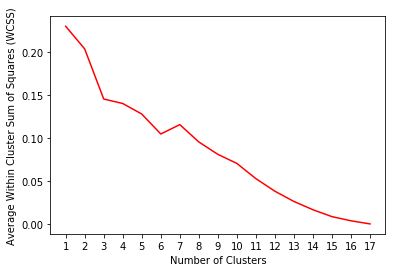

In [509]:
import matplotlib.pyplot as plt
%matplotlib inline

xticks = accuracy["number of clusters"].values.tolist()

plt.plot(accuracy["number of clusters"].values, accuracy["accuracy"].values, '-r')
plt.xlabel("Number of Clusters")
plt.ylabel("Average Within Cluster Sum of Squares (WCSS)")
plt.xticks(xticks)

I chose 3 clusters as an optimal number because there is a significant drop of the Av. WCSS, and relatively big number of datapoints within clusters

In [516]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 0, 1, 2, 2, 1, 2, 2], dtype=int32)

In [768]:
kmeans_cluster_center_coordinates = kmeans.cluster_centers_
kmeans_cluster_center_coordinates

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.33928571e-01,  0.00000000e+00,  1.33928571e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.33928571e-01,  1.33928571e-01,  0.00000000e+00,
         1.33928571e-01,  0.00000000e+00,  0.00000000e+00,
         1.96428571e-01,  1.33928571e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.21455939e-02,  2.32723145e-02,  1.97247055e-02,
         2.32723145e-02,  8.98254576e-02,  3.83141762e-03,
         3.47665673e-02,  1.94408968e-02,  1.03732085e-01,
         3.85979850e-02,  3.83141762e-03,  3.83141762e-03,
         6.13026820e-02,  5.80388818e-02,  1.91570881e-02,
         8.86902228e-02,  5.77550731e-02,  3.85979850e-02,
         4.27132113e-02,  7.94664396e-03,  0.00000000e+00,
         7.66283525e-03,  2.35561232e-02,  6.15864907e-02,
         1.26720590e-01],
    

In [573]:
# Let's create a new dataframe that includes the cluster as well as the top 10 venues for each egg place.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'cluster label', kmeans.labels_)

egg_places_merged = places_w_tips

# merge neighborhoods_venues_sorted with egg_places_merged to add latitude/longitude for each egg place

egg_places_merged = pd.merge(egg_places_merged, neighborhoods_venues_sorted, how='left', left_on="venue id", right_on="egg place venue id")

# reordering columns
egg_places_merged = egg_places_merged[['egg place venue id', 'egg place venue name', 'categories', 'cluster label', 'description', 'rating', 'tips count',
       'been here count', 'likes.count', 'listed count', 'address',
       'latitude', 'longitude', 'postal code', 'tip id', 'text', 'lang',
       'tip likes count', 'tip agree count', 'tip disagree count', 'user id',
       '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue']]

# rename column
egg_places_merged.rename(columns={"likes.count": "venue likes count"}, inplace = True)

print(egg_places_merged.shape)
egg_places_merged.tail()

(17, 31)


egg place venue id                egg place venue name  \
12  4de77728e4cdfedb8a9dad41  Claus - La table du petit-déjeuner   
13  524fef8411d29554626d9a1a  Le Pain Quotidien                    
14  5710c77a498e3021c0641aa9  Hardware Société                     
15  4b8a5057f964a520146832e3  Twinkie Breakfasts                   
16  531499ec11d2a01b87e9e3a3  Paperboy                             

        categories  cluster label  \
12  Breakfast Spot  2               
13  Breakfast Spot  0               
14  Breakfast Spot  2               
15  Breakfast Spot  1               
16  Breakfast Spot  1               

                                                                                                                   description  \
12  Confitures et granola dans un café cosy spécialisé dans le petit déjeuner, servant brunch et goûter.                         
13  Le Pain Quotidien porte bien son nom. Et pour nous, cela veut tout dire. Au-delà des simples mots, c’est un mode de vie.     
14  Cadre cosy pour cette antenne parisienne d'un café australien qui sert des saveurs gourmandes pour le brunch.                
15  no value                                                                                                                     
16  no value                                                                                                                     

    rating  tips count  been here count  venue likes count  listed count  \
12  8.3     150         0                331                1542           
13  7.3     21          0                75                 46             
14  9.3     125         0                346                2760           
15  7.8     110         0                207                686            
16  8.7     123         0                358                1712           

             ...           1st Most Common Venue  2nd Most Common Venue  \
12           ...            French Restaurant     Food                    
13           ...            French Restaurant     Dessert Shop            
14           ...            French Restaurant     Restaurant              
15           ...            Bar                   French Restaurant       
16           ...            Bar                   Shop & Service          

    3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
12  Bar                    Shop & Service         Bakery                 
13  Creperie               Bakery                 Breakfast Spot         
14  Food                   Outdoors & Recreation  Bar                    
15  Plaza                  Athletics & Sports     Japanese Restaurant    
16  Asian Restaurant       Bakery                 Restaurant             

   6th Most Common Venue 7th Most Common Venue  8th Most Common Venue  \
12  Chinese Restaurant    Clothing Store        Food & Drink Shop       
13  Hotel                 Coffee Shop           NaN                     
14  Dessert Shop          Asian Restaurant      Bakery                  
15  Food                  Bakery                Clothing Store          
16  Hotel                 Food & Drink Shop     Arts & Entertainment    

    9th Most Common Venue  10th Most Common Venue  
12  Arts & Entertainment   NaN                     
13  NaN                    NaN                     
14  Creperie               Arts & Entertainment    
15  Coffee Shop            Restaurant              
16  Food                   Athletics & Sports      

[5 rows x 31 columns]

In [522]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
paris_geo = "../coursera_ibm_data_science/data/00_arrondissements.geojson"
map_clusters = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

map_clusters.choropleth(
    geo_data=paris_geo,
    fill_color='YlGn', 
    line_color='red',
    fill_opacity=0.1, 
    line_opacity=0.7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(egg_places_merged['latitude'], egg_places_merged['longitude'], egg_places_merged['egg place venue name'], egg_places_merged['cluster label']):
    label = folium.Popup(str(poi) + ', Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 2.3.F. Examine k-means clusters

In order to understand what are main characteristics of clusters let's display top 10 most frequent nearby venue categories for each egg-place in each cluster 

In [591]:
egg_places_merged.loc[egg_places_merged['cluster label'] == 0, egg_places_merged.columns[[1] + [2] + [3] + list(range(21, egg_places_merged.shape[1]))]]

egg place venue name      categories  cluster label 1st Most Common Venue  \
11  Café Marlette        Breakfast Spot  0              Dessert Shop           
13  Le Pain Quotidien    Breakfast Spot  0              French Restaurant      

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
11  Creperie              Bakery                Breakfast Spot         
13  Dessert Shop          Creperie              Bakery                 

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
11  Hotel                 French Restaurant     Coffee Shop            
13  Breakfast Spot        Hotel                 Coffee Shop            

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
11  NaN                   NaN                   NaN                    
13  NaN                   NaN                   NaN

=> relatively fast eating spots

In [592]:
egg_places_merged.loc[egg_places_merged['cluster label'] == 1, egg_places_merged.columns[[1] + [2] + [3] + list(range(21, egg_places_merged.shape[1]))]]

egg place venue name          categories  cluster label  \
0   Benedict             French Restaurant   1               
4   Le Mary Céleste      Cocktail Bar        1               
5   Café de Flore        Café                1               
6   Angelina             Tea Room            1               
7   Ladurée              Pastry Shop         1               
9   Biglove Caffè        Italian Restaurant  1               
10  Eggs & Co            French Restaurant   1               
15  Twinkie Breakfasts   Breakfast Spot      1               
16  Paperboy             Breakfast Spot      1               

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0   Dessert Shop          French Restaurant     Shop & Service         
4   Clothing Store        Shop & Service        Coffee Shop            
5   Clothing Store        Shop & Service        Italian Restaurant     
6   Clothing Store        French Restaurant     Hotel                  
7   Shop & Service        Hotel                 French Restaurant      
9   Bar                   Food                  Shop & Service         
10  Italian Restaurant    Clothing Store        French Restaurant      
15  Bar                   French Restaurant     Plaza                  
16  Bar                   Shop & Service        Asian Restaurant       

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0   Clothing Store        Bar                   Restaurant             
4   Dessert Shop          Arts & Entertainment  Bar                    
5   French Restaurant     Food                  Restaurant             
6   Shop & Service        Japanese Restaurant   Bar                    
7   Clothing Store        Restaurant            Athletics & Sports     
9   Food & Drink Shop     Coffee Shop           Clothing Store         
10  Shop & Service        Café                  Restaurant             
15  Athletics & Sports    Japanese Restaurant   Food                   
16  Bakery                Restaurant            Hotel                  

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0   Arts & Entertainment  Nightlife Spot        Italian Restaurant     
4   Café                  Italian Restaurant    Athletics & Sports     
5   Plaza                 Japanese Restaurant   Hotel                  
6   Dessert Shop          Food                  Restaurant             
7   Bakery                Breakfast Spot        Café                   
9   Restaurant            Dessert Shop          Arts & Entertainment   
10  Dessert Shop          Japanese Restaurant   Plaza                  
15  Bakery                Clothing Store        Coffee Shop            
16  Food & Drink Shop     Arts & Entertainment  Food                   

   10th Most Common Venue  
0   Food                   
4   Bakery                 
5   Asian Restaurant       
6   Coffee Shop            
7   Chinese Restaurant     
9   Japanese Restaurant    
10  Chinese Restaurant     
15  Restaurant             
16  Athletics & Sports

=> clothing stores + bars + shops + french restaurants

In [593]:
egg_places_merged.loc[egg_places_merged['cluster label'] == 2, egg_places_merged.columns[[1] + [2] + [3] + list(range(21, egg_places_merged.shape[1]))]]

egg place venue name         categories  cluster label  \
1   Le Saint-Régis                      Bistro             2               
2   Holybelly 19                        Breakfast Spot     2               
3   Carette                             Tea Room           2               
8   Les Bonnes Sœurs                    French Restaurant  2               
12  Claus - La table du petit-déjeuner  Breakfast Spot     2               
14  Hardware Société                    Breakfast Spot     2               

   1st Most Common Venue  2nd Most Common Venue 3rd Most Common Venue  \
1   French Restaurant     Outdoors & Recreation  Creperie               
2   Coffee Shop           Asian Restaurant       Bakery                 
3   French Restaurant     Food                   Arts & Entertainment   
8   French Restaurant     Coffee Shop            Food                   
12  French Restaurant     Food                   Bar                    
14  French Restaurant     Restaurant             Food                   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1   Shop & Service         Restaurant            Food & Drink Shop      
2   French Restaurant      Food                  Restaurant             
3   Hotel                  Plaza                 Asian Restaurant       
8   Shop & Service         Café                  Restaurant             
12  Shop & Service         Bakery                Chinese Restaurant     
14  Outdoors & Recreation  Bar                   Dessert Shop           

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1   Dessert Shop          Italian Restaurant    Food                   
2   Athletics & Sports    Breakfast Spot        Hotel                  
3   Bar                   Café                  Clothing Store         
8   Food & Drink Shop     Bakery                Arts & Entertainment   
12  Clothing Store        Food & Drink Shop     Arts & Entertainment   
14  Asian Restaurant      Bakery                Creperie               

   10th Most Common Venue  
1   Bakery                 
2   Chinese Restaurant     
3   Coffee Shop            
8   Hotel                  
12  NaN                    
14  Arts & Entertainment

=> french resto + other food points + outdoor + shops

### 2.3.G. Finding potential places to open egg-place

By finding similar clusters in other locations

1. Cover Paris with a coordinates grid = 300 m scale (300 m distance is chosen because thus all venues would belong to a radius of 200 m of at least one grid point) 
2. Find venues within 200m distance from each point (I limited number of venues by 24, since only one point in initial egg-places list has more than 24 venues around. And this limit would reduce query time)
3. Detect, whether each of grid points belongs to any of 3 egg-places clusters (methodology described below)

#### i. Cover Paris witр coordinates grid at 300 m scale  

1. Initialize a point on map
2. Check whether next point is in paris 
     * move right on 300 m
         * if point is in paris, add coordinates into list
         * else don't
     * move right on 300 m untill the combination of locations 2 consecutive points would be (in paris, not in paris)
         * move to the initial longitude and latitude 300 m lower than initial point. 
         * repeat
         
As far as I need a grid in meters I need to project lat/lon boundaries of your input area (your certain area on a map) into a coordinate system that supports distances in meters. 

A suitable projection for Europe is EPSG:3035
* I'll transform Paris area into that projection, 
* create a grid by straightforward iteration, get the points, 
* project them back to lat/lon pairs which can be used to query Foursquare. 

In python, we can use the libraries shapely and pyproj to work on geographic shapes and projections

In [599]:
import shapely.geometry
import pyproj

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

# get metric grid for paris
# source of degree Paris polygone https://global.mapit.mysociety.org/area/29746.geojson

import json
with open("../coursera_ibm_data_science/data/00_paris.geojson") as json_file:
    paris_poly_deg = json.load(json_file)

# create dataframe for paris polygon in degree 
paris_poly_list = paris_poly_deg['coordinates'][0]
paris_poly_df = pd.DataFrame(paris_poly_list, columns = ["lon", "lat"])

paris_poly_df = paris_poly_df[['lon', 'lat']]

print(paris_poly_df.shape)
paris_poly_df.head()

(716, 2)


lon        lat
0  2.415993  48.846614
1  2.416071  48.846982
2  2.416119  48.847205
3  2.416138  48.847293
4  2.416156  48.847381

In [602]:
# Set up projections
p_ll = pyproj.Proj(init='epsg:4326') # degrees
p_mt = pyproj.Proj(init='epsg:3857') # metric; same as EPSG:900913

# transform paris polygon degree dataframe into metric list of coordinates tuples
paris_poly_metr_tuples = []

[paris_poly_metr_tuples.append(pyproj.transform(p_ll, p_mt, x, y)) for x, y in zip(paris_poly_df['lon'], paris_poly_df['lat'])] 

paris_poly_metr_tuples[0:3]

[(268947.06599231635, 6248874.978860967),
 (268955.8379681921, 6248937.263336712),
 (268961.1367759533, 6248974.901515938)]

In [604]:
# get square mask of coordinates grid on top of paris

# Set up projections
p_ll = pyproj.Proj(init='epsg:4326') # degrees
p_mt = pyproj.Proj(init='epsg:3857') # metric; same as EPSG:900913

# Create corners of rectangle to be transformed to a grid
sw = shapely.geometry.Point((2.249464, 48.815284)) 
ne = shapely.geometry.Point((2.412439, 48.904749)) 

stepsize = 300 # 300m grid step size

# Project corners to target projection
s = pyproj.transform(p_ll, p_mt, sw.x, sw.y) # Transform SW point to metric
e = pyproj.transform(p_ll, p_mt, ne.x, ne.y) # .. same for NE

# Iterate over 2D area
paris_gridpoints_met_sq = []
x = s[0]

while x < e[0]:
    y = s[1]
    while y < e[1]:
        p = [x, y]
        paris_gridpoints_met_sq.append(p)
        y += stepsize
    x += stepsize

# check number of points
print(len(paris_gridpoints_met_sq))
paris_gridpoints_met_sq[0:4]

3111


[[250409.18703780093, 6243576.875663976],
 [250409.18703780093, 6243876.875663976],
 [250409.18703780093, 6244176.875663976],
 [250409.18703780093, 6244476.875663976]]

In [606]:
# select only points within paris metric polygon

paris_gridpoints_met_poly = []
polygon = Polygon(paris_poly_metr_tuples)

for i in range(0, len(paris_gridpoints_met_sq)):
    point = Point(paris_gridpoints_met_sq[i][0], paris_gridpoints_met_sq[i][1])
    if polygon.contains(point) == True:
        paris_gridpoints_met_poly.append([paris_gridpoints_met_sq[i][0], paris_gridpoints_met_sq[i][1]])

# check number of points
print(len(paris_gridpoints_met_poly))
paris_gridpoints_met_poly[0:3]

2345


[[250409.18703780093, 6248976.875663976],
 [250409.18703780093, 6249276.875663976],
 [250409.18703780093, 6249576.875663976]]

In [608]:
# transform selected points within paris from metric coordinates back to degrees

paris_gridpoints_deg_poly = []

for i in range(0, len(paris_gridpoints_met_poly)):
    x = paris_gridpoints_met_poly[i][0]
    y = paris_gridpoints_met_poly[i][1]
    p = pyproj.transform(p_mt, p_ll, x, y)
    paris_gridpoints_deg_poly.append(p)

# check number of points
print(len(paris_gridpoints_deg_poly))
paris_gridpoints_deg_poly[0:3]

2345


[(2.2494640000000055, 48.8472164702487),
 (2.2494640000000055, 48.848989899663245),
 (2.2494640000000055, 48.85076326626965)]

In [609]:
paris_gridpoints_deg_poly_df = pd.DataFrame(paris_gridpoints_deg_poly, columns = ['lon', 'lat'])
paris_gridpoints_deg_poly_df.head(3)

lon        lat
0  2.249464  48.847216
1  2.249464  48.848990
2  2.249464  48.850763

In [615]:
# plot points on map

# create map
paris_geo = "../coursera_ibm_data_science/data/00_arrondissements.geojson"
map_grid = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

map_grid.choropleth(
    geo_data=paris_geo,
    fill_color='YlGn', 
    line_color='red',
    fill_opacity=0.1, 
    line_opacity=0.7)


# add markers to the map
markers_colors = []
for lat, lon in zip(paris_gridpoints_deg_poly_df['lat'], paris_gridpoints_deg_poly_df['lon']):
    folium.CircleMarker(
        [lat, lon],
        radius=0.5,
        color="red",
        fill=True,
        fill_color="red",
        fill_opacity=1).add_to(map_grid)
       
map_grid

#### ii. Find 24 nearby venues in radius 200 m for each point

Even though for egg-serving breakfasting venues we retreived up to 30 nearby venues, here this number was limited to 24, since this significantly reduce the query time. But this decision might impact the accuracy of grid points attributions to clusters defined earlier    

Since number of venue queries per 24h is limited to 10000, I used several Foursquare accounts to collect nearby venues for all points

In [661]:
# function for retreiving venues for a given pair of coordinates

def getNearbyVenues(index, latitudes, longitudes, radius=200, limit = 24):
    
    venues_list = []
    for ind, lat, lng in zip(index, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID_4, CLIENT_SECRET_4, VERSION, lat, lng, radius, limit)
        
        # make the GET request
        raw_results = requests.get(url).json()['response']
        
        if raw_results != {}:
            results = raw_results['groups'][0]['items']
        
            # return only relevant information for each nearby venue        
            venues_list.append([(
                ind,
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['point index', 
                  'point latitude', 
                  'point longitude', 
                  'venue', 
                  'venue latitude', 
                  'venue longitude', 
                  'venue main category']
    
    return(nearby_venues)

In [640]:
nearby_venues_1 = getNearbyVenues(index = list(paris_gridpoints_deg_poly_df.index)[0:416],
                                           latitudes = paris_gridpoints_deg_poly_df['lat'][0:416],
                                           longitudes = paris_gridpoints_deg_poly_df['lon'][0:416])

print(nearby_venues_1.shape)
nearby_venues_1.tail(3)

(2820, 7)


point index  point latitude  point longitude                  venue  \
2817  415          48.873811       2.289888         MonHotel Lounge & Spa   
2818  415          48.873811       2.289888         Mon Resto               
2819  415          48.873811       2.289888         Fiarino                 

      venue latitude  venue longitude venue main category  
2817  48.874291       2.289776         Hotel               
2818  48.874595       2.289748         French Restaurant   
2819  48.875161       2.289434         Men's Store

In [642]:
nearby_venues_2 = getNearbyVenues(index = list(paris_gridpoints_deg_poly_df.index)[416:560],
                                           latitudes = paris_gridpoints_deg_poly_df['lat'][416:560],
                                           longitudes = paris_gridpoints_deg_poly_df['lon'][416:560])

print(nearby_venues_2.shape)
nearby_venues_2.tail(3)

(1956, 7)


point index  point latitude  point longitude  \
1953  559          48.873811       2.300668          
1954  559          48.873811       2.300668          
1955  559          48.873811       2.300668          

                                             venue  venue latitude  \
1953  Les Écuries - La Crêperie des Champs-Élysées  48.872249        
1954  Edern                                         48.873719        
1955  Hôtel Chateaubriand                           48.873303        

      venue longitude venue main category  
1953  2.301908         Creperie            
1954  2.298388         French Restaurant   
1955  2.302581         Hotel

In [648]:
nearby_venues_3 = getNearbyVenues(index = list(paris_gridpoints_deg_poly_df.index)[560:1248],
                                           latitudes = paris_gridpoints_deg_poly_df['lat'][560:1248],
                                           longitudes = paris_gridpoints_deg_poly_df['lon'][560:1248])

print(nearby_venues_3.shape)
nearby_venues_3.tail(3)

(8738, 7)


point index  point latitude  point longitude            venue  \
8735  1247         48.827705       2.343787         Gérard Mulot      
8736  1247         48.827705       2.343787         L'ariel           
8737  1247         48.827705       2.343787         Marché Glaciere   

      venue latitude  venue longitude venue main category  
8735  48.828884       2.342990         Dessert Shop        
8736  48.826477       2.341900         Café                
8737  48.826743       2.341896         Farmers Market

In [651]:
nearby_venues_4 = getNearbyVenues(index = list(paris_gridpoints_deg_poly_df.index)[1248:1464],
                                           latitudes = paris_gridpoints_deg_poly_df['lat'][1248:1464],
                                           longitudes = paris_gridpoints_deg_poly_df['lon'][1248:1464])

print(nearby_venues_4.shape)
nearby_venues_4.tail(3)

(3476, 7)


point index  point latitude  point longitude            venue  \
3473  1463         48.872039       2.354567         Mazzucco          
3474  1463         48.872039       2.354567         Le Daily Syrien   
3475  1463         48.872039       2.354567         Derya             

      venue latitude  venue longitude venue main category  
3473  48.871606       2.352936         Italian Restaurant  
3474  48.871901       2.353699         Falafel Restaurant  
3475  48.870629       2.353128         Turkish Restaurant

In [654]:
nearby_venues_5 = getNearbyVenues(index = list(paris_gridpoints_deg_poly_df.index)[1464:1664],
                                           latitudes = paris_gridpoints_deg_poly_df['lat'][1464:1664],
                                           longitudes = paris_gridpoints_deg_poly_df['lon'][1464:1664])

print(nearby_venues_5.shape)
nearby_venues_5.tail(3)

(627, 7)


point index  point latitude  point longitude                venue  \
624  1511         48.872039       2.357262         La Pendule Occitane   
625  1511         48.872039       2.357262         Le Renouveau          
626  1511         48.872039       2.357262         Les Rupins            

     venue latitude  venue longitude venue main category  
624  48.871151       2.357966         French Restaurant   
625  48.873193       2.358176         Bar                 
626  48.871883       2.359683         Bistro

In [658]:
nearby_venues_7 = getNearbyVenues(index = list(paris_gridpoints_deg_poly_df.index)[1512:1864],
                                           latitudes = paris_gridpoints_deg_poly_df['lat'][1512:1864],
                                           longitudes = paris_gridpoints_deg_poly_df['lon'][1512:1864])

print(nearby_venues_7.shape)
nearby_venues_7.tail(3)

(4141, 7)


point index  point latitude  point longitude  \
4138  1863         48.831253       2.378821          
4139  1863         48.831253       2.378821          
4140  1863         48.831253       2.378821          

                                            venue  venue latitude  \
4138  Presse Café                                  48.830040        
4139  H&M                                          48.830568        
4140  Vélib' [13054] (Pau Casals • Neuve Tolbiac)  48.831108        

      venue longitude       venue main category  
4138  2.380277         Café                      
4139  2.376354         Clothing Store            
4140  2.377381         Bike Rental / Bike Share

In [660]:
nearby_venues_8 = getNearbyVenues(index = list(paris_gridpoints_deg_poly_df.index)[1864:2080],
                                           latitudes = paris_gridpoints_deg_poly_df['lat'][1864:2080],
                                           longitudes = paris_gridpoints_deg_poly_df['lon'][1864:2080])

print(nearby_venues_8.shape)
nearby_venues_8.tail(3)

(2249, 7)


point index  point latitude  point longitude                venue  \
2246  2076         48.900392       2.389601         Place Auguste Baron   
2247  2077         48.827705       2.392296         Le Petit Boeuf        
2248  2077         48.827705       2.392296         La Grande Récré       

      venue latitude  venue longitude venue main category  
2246  48.900572       2.387162         Plaza               
2247  48.826478       2.391167         French Restaurant   
2248  48.826418       2.393131         Toy / Game Store

In [663]:
nearby_venues_9 = getNearbyVenues(index = list(paris_gridpoints_deg_poly_df.index)[2078:],
                                           latitudes = paris_gridpoints_deg_poly_df['lat'][2078:],
                                           longitudes = paris_gridpoints_deg_poly_df['lon'][2078:])

print(nearby_venues_9.shape)
nearby_venues_9.tail(3)

(1559, 7)


point index  point latitude  point longitude  \
1556  2344         48.877356       2.411161          
1557  2344         48.877356       2.411161          
1558  2344         48.877356       2.411161          

                           venue  venue latitude  venue longitude  \
1556  Aubert                      48.878363       2.410550          
1557  Le Coin Du Pain             48.878271       2.409876          
1558  Bio c' Bon Paris Les Lilas  48.878669       2.412478          

     venue main category  
1556  Baby Store          
1557  Sandwich Place      
1558  Supermarket

In [665]:
# final dataframe merged

nearby_venues = pd.concat([nearby_venues_1, nearby_venues_2, nearby_venues_3, nearby_venues_4, nearby_venues_5, nearby_venues_7, nearby_venues_8, nearby_venues_9], axis=0, sort=False)
print(nearby_venues.shape)
nearby_venues.head(3)

(25566, 7)


point index  point latitude  point longitude                    venue  \
0  0            48.847216       2.249464         Court Philippe Chatrier   
1  0            48.847216       2.249464         Court n°1                 
2  0            48.847216       2.249464         Stade Roland Garros       

   venue latitude  venue longitude venue main category  
0  48.847162       2.249240         Tennis Court        
1  48.846608       2.250470         Tennis Court        
2  48.846869       2.248228         Tennis Court

#### iii. Clean grid points nearby venues list

Since initial egg places have nearby places of only 112 raw categories, we can remove from the list all places which do not fall into the list of such categories. Because they won't have any significance for clustering

After doing this, we'll replace raw categories by more high level ones the same way it was done for egg_places_nearby_venues to reduce number of parameters for clustering

Thus we obtain a final list of grid points which we'll try to attribute to earlier defined 3 clusters

In [668]:
# list of raw categories for vanues which are nearby initial egg_places
raw_categories = categories_mapping["venue main category"].tolist()
print(len(raw_categories))
raw_categories[0:3]

112


['Jazz Club', 'Theater', 'Art Gallery']

In [670]:
# select only venues with categories in this list 
nearby_venues_cleaned = nearby_venues[nearby_venues['venue main category'].isin(raw_categories)]
print(nearby_venues_cleaned.shape)
nearby_venues_cleaned.head(3)

(20521, 7)


point index  point latitude  point longitude                        venue  \
3   0            48.847216       2.249464         Le Village                    
4   0            48.847216       2.249464         Restaurant Le Roland Garros   
13  0            48.847216       2.249464         Tenniseum – Musée de la FFT   

    venue latitude  venue longitude venue main category  
3   48.846126       2.250264         Shopping Plaza      
4   48.847226       2.250683         French Restaurant   
13  48.847436       2.250532         Museum

In [674]:
# replace those raw categories by more high level according to the mapping table used above
nearby_venues_replaced_categories_raw = nearby_venues_cleaned.merge(categories_mapping, 
                                                                                  how='left', 
                                                                                  left_on = "venue main category",
                                                                                  right_on = "venue main category")

# remove columns with initial categories
nearby_venues_replaced_categories = nearby_venues_replaced_categories_raw.drop(columns = ["main category id", "venue main category"], axis = 1)
print(nearby_venues_replaced_categories.shape)
nearby_venues_replaced_categories.head()

(20521, 8)


point index  point latitude  point longitude                        venue  \
0  0            48.847216       2.249464         Le Village                    
1  0            48.847216       2.249464         Restaurant Le Roland Garros   
2  0            48.847216       2.249464         Tenniseum – Musée de la FFT   
3  0            48.847216       2.249464         Club des Loges                
4  0            48.847216       2.249464         Place des Mousquetaires       

   venue latitude  venue longitude     final category tag id  \
0  48.846126       2.250264         4d4b7105d754a06378d81259   
1  48.847226       2.250683         4bf58dd8d48988d10c941735   
2  48.847436       2.250532         4d4b7104d754a06370d81259   
3  48.847785       2.246898         4bf58dd8d48988d1c4941735   
4  48.846803       2.249981         4bf58dd8d48988d164941735   

     final category tag  
0  Shop & Service        
1  French Restaurant     
2  Arts & Entertainment  
3  Restaurant            
4  Plaza

#### iv. Analyze each gridpoint neighborhood

We'll find how often a venue of each of categories occures near each of grid points.  
To do this we'll 
1. One hot encode categories
2. Take mean frequency of their occurence
3. To make results more visual we'll create a chart of top 10 nearby venues categories and arrange them by descending occurence. In cases there would be less nearby venues' categories than 10, well put nan to remaining cells

In [677]:
# one hot encoding
onehot_grid = pd.get_dummies(nearby_venues_replaced_categories[['final category tag']], prefix="", prefix_sep="")

# add initial egg place columns back to dataframe
onehot_grid['point index'] = nearby_venues_replaced_categories['point index']

# move initial egg place columns to the first column
fixed_columns_1 = list(onehot_grid.columns[-1:]) + list(onehot_grid.columns[:-1])
onehot_grid = onehot_grid[fixed_columns_1]

print(onehot_grid.shape)
onehot_grid.head()

(20521, 26)


point index  Arts & Entertainment  Asian Restaurant  Athletics & Sports  \
0  0            0                     0                 0                    
1  0            0                     0                 0                    
2  0            1                     0                 0                    
3  0            0                     0                 0                    
4  0            0                     0                 0                    

   Bakery  Bar  Breakfast Spot  Café  Chinese Restaurant  Clothing Store  \
0  0       0    0               0     0                   0                
1  0       0    0               0     0                   0                
2  0       0    0               0     0                   0                
3  0       0    0               0     0                   0                
4  0       0    0               0     0                   0                

        ...        French Restaurant  Hotel  Italian Restaurant  \
0       ...        0                  0      0                    
1       ...        1                  0      0                    
2       ...        0                  0      0                    
3       ...        0                  0      0                    
4       ...        0                  0      0                    

   Japanese Restaurant  Nightlife Spot  Outdoors & Recreation  Pharmacy  \
0  0                    0               0                      0          
1  0                    0               0                      0          
2  0                    0               0                      0          
3  0                    0               0                      0          
4  0                    0               0                      0          

   Plaza  Restaurant  Shop & Service  
0  0      0           1               
1  0      0           0               
2  0      0           0               
3  0      1           0               
4  1      0           0               

[5 rows x 26 columns]

In [679]:
# Next, let's group rows by point index and by taking the mean of the frequency of occurrence of each category
grouped_grid = onehot_grid.groupby(['point index']).mean().reset_index()
grouped_grid.sort_values("point index", ascending=True, inplace=True)
grouped_grid.reset_index(drop = True, inplace = True)
print(grouped_grid.shape)
grouped_grid.head()

(2177, 26)


point index  Arts & Entertainment  Asian Restaurant  Athletics & Sports  \
0  0            0.2                   0.0               0.0                  
1  1            1.0                   0.0               0.0                  
2  9            0.0                   0.0               0.0                  
3  10           0.0                   0.0               0.0                  
4  12           0.0                   0.0               0.0                  

   Bakery  Bar  Breakfast Spot  Café  Chinese Restaurant  Clothing Store  \
0  0.0     0.0  0.0             0.0   0.0                 0.0              
1  0.0     0.0  0.0             0.0   0.0                 0.0              
2  0.0     0.0  0.0             0.0   0.0                 0.0              
3  0.0     0.0  0.0             0.0   0.0                 0.0              
4  0.0     0.0  0.0             0.0   0.0                 0.0              

        ...        French Restaurant  Hotel  Italian Restaurant  \
0       ...        0.2                0.0    0.0                  
1       ...        0.0                0.0    0.0                  
2       ...        1.0                0.0    0.0                  
3       ...        1.0                0.0    0.0                  
4       ...        0.0                0.0    0.0                  

   Japanese Restaurant  Nightlife Spot  Outdoors & Recreation  Pharmacy  \
0  0.0                  0.0             0.0                    0.0        
1  0.0                  0.0             0.0                    0.0        
2  0.0                  0.0             0.0                    0.0        
3  0.0                  0.0             0.0                    0.0        
4  0.0                  0.0             1.0                    0.0        

   Plaza  Restaurant  Shop & Service  
0  0.2    0.2         0.2             
1  0.0    0.0         0.0             
2  0.0    0.0         0.0             
3  0.0    0.0         0.0             
4  0.0    0.0         0.0             

[5 rows x 26 columns]

In [683]:
# Now let's create the new dataframe and display the top 10 venues for each grid point

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['point index']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
gridpoints_neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
gridpoints_neighborhoods_venues_sorted['point index'] = grouped_grid['point index']

for ind in np.arange(grouped_grid.shape[0]):
    gridpoints_neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues_1(grouped_grid.iloc[ind, :], num_top_venues)

gridpoints_neighborhoods_venues_sorted['point index'] = grouped_grid['point index']

print(gridpoints_neighborhoods_venues_sorted.shape) 
gridpoints_neighborhoods_venues_sorted.head()

(2177, 11)


point index  1st Most Common Venue 2nd Most Common Venue  \
0  0            Shop & Service         Plaza                  
1  1            NaN                    NaN                    
2  9            French Restaurant      NaN                    
3  10           French Restaurant      NaN                    
4  12           Outdoors & Recreation  NaN                    

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0  French Restaurant     Restaurant            NaN                    
1  NaN                   NaN                   NaN                    
2  NaN                   NaN                   NaN                    
3  NaN                   NaN                   NaN                    
4  NaN                   NaN                   NaN                    

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0  NaN                   NaN                   NaN                    
1  NaN                   NaN                   NaN                    
2  NaN                   NaN                   NaN                    
3  NaN                   NaN                   NaN                    
4  NaN                   NaN                   NaN                    

  9th Most Common Venue 10th Most Common Venue  
0  NaN                   NaN                    
1  NaN                   NaN                    
2  NaN                   NaN                    
3  NaN                   NaN                    
4  NaN                   NaN

#### v. Attribute each point to one of clusters earlier defined or set it as an outlier

1. For each grid point calculate euclidian distance to each of 3 kmeans_cluster_center
2. For each grid point select a closest cluster center
3. For each cluster build distribution of distances from its center to each of its closest points
4. Set cutoff distance to determine which points would fall into a cluster, which are outliers (ideas on how to determine such distance – see below)

**Calculation of a distance to closest cluster center**

In [769]:
kmeans_cluster_center_coordinates

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.33928571e-01,  0.00000000e+00,  1.33928571e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.33928571e-01,  1.33928571e-01,  0.00000000e+00,
         1.33928571e-01,  0.00000000e+00,  0.00000000e+00,
         1.96428571e-01,  1.33928571e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 4.21455939e-02,  2.32723145e-02,  1.97247055e-02,
         2.32723145e-02,  8.98254576e-02,  3.83141762e-03,
         3.47665673e-02,  1.94408968e-02,  1.03732085e-01,
         3.85979850e-02,  3.83141762e-03,  3.83141762e-03,
         6.13026820e-02,  5.80388818e-02,  1.91570881e-02,
         8.86902228e-02,  5.77550731e-02,  3.85979850e-02,
         4.27132113e-02,  7.94664396e-03,  0.00000000e+00,
         7.66283525e-03,  2.35561232e-02,  6.15864907e-02,
         1.26720590e-01],
    

In [797]:
# list of two-values lists: cluster index + minimal distance
closest_cluster_index_and_distance = []

for i in range (0, len(grouped_grid)):
    grid_point = grouped_grid.iloc[i][1:].values
    distances = []
    
    for j in range (0, len(kmeans_cluster_center_coordinates)):
        cluster_center = kmeans_cluster_center_coordinates[j]
        dist = np.linalg.norm(grid_point-cluster_center)
        distances.append(dist)
    
    closest_cluster_index_and_distance.append([distances.index(min(distances)), min(distances)])

In [800]:
# dataframe with point index, closest cluster index and distance from cluster center to the point
grid_point_index = grouped_grid[["point index"]]
closest_cluster_index_and_distance_df = pd.DataFrame(closest_cluster_index_and_distance, columns = ["closest cluster index", 
                                                                                        "distance to cluster center"])
grid_points_and_closest_clusters_df = pd.concat([grid_point_index, closest_cluster_index_and_distance_df], axis=1, sort=False)
print(grid_points_and_closest_clusters_df.shape)
grid_points_and_closest_clusters_df.head()

(2177, 3)


point index  closest cluster index  distance to cluster center
0  0            2                      0.357567                  
1  1            1                      0.991687                  
2  9            2                      0.816250                  
3  10           2                      0.816250                  
4  12           2                      0.998388

In [801]:
# are all clusters present for those points?
grid_points_and_closest_clusters_df['closest cluster index'].unique()

array([2, 1, 0])

**Distribution of distances to closest gridpoints for each cluster**

In [807]:
# Datapoints near cluster zero center
grid_points_0 = grid_points_and_closest_clusters_df[grid_points_and_closest_clusters_df['closest cluster index'] == 0]
print(grid_points_0.shape)
grid_points_0.head()

(87, 3)


point index  closest cluster index  distance to cluster center
94   146          0                      0.562004                  
121  178          0                      0.937202                  
153  220          0                      0.562004                  
175  246          0                      0.937202                  
211  286          0                      0.723318

Text(0.5,1,'distance to cluster Zero center bins')

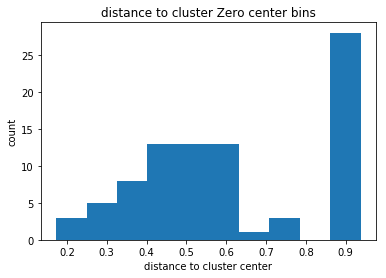

In [810]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(grid_points_0["distance to cluster center"])

# set x/y labels and plot title
plt.pyplot.xlabel("distance to cluster center")
plt.pyplot.ylabel("count")
plt.pyplot.title("distance to cluster Zero center bins")

In [809]:
# Datapoints near cluster one center
grid_points_1 = grid_points_and_closest_clusters_df[grid_points_and_closest_clusters_df['closest cluster index'] == 1]
print(grid_points_1.shape)

(788, 3)


Text(0.5,1,'distance to cluster One center bins')

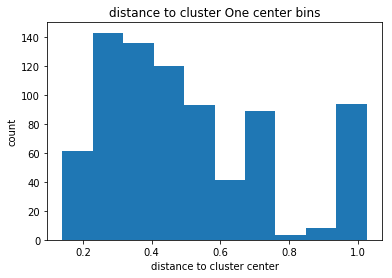

In [811]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(grid_points_1["distance to cluster center"])

# set x/y labels and plot title
plt.pyplot.xlabel("distance to cluster center")
plt.pyplot.ylabel("count")
plt.pyplot.title("distance to cluster One center bins")

In [812]:
# Datapoints near cluster Two center
grid_points_2 = grid_points_and_closest_clusters_df[grid_points_and_closest_clusters_df['closest cluster index'] == 2]
print(grid_points_2.shape)

(1302, 3)


Text(0.5,1,'distance to cluster One center bins')

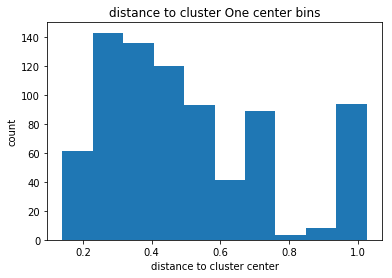

In [813]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(grid_points_1["distance to cluster center"])

# set x/y labels and plot title
plt.pyplot.xlabel("distance to cluster center")
plt.pyplot.ylabel("count")
plt.pyplot.title("distance to cluster One center bins")

#### Choose cutoff distances for belongin to each of 3 clusters

I initially decided to set a cutoff distance which I would take to define whether a grid point belong to a nerby cluster = maximal distance from a cluster center to its points (egg places)  
But that gave me too much points in the city (over 800)
Thus I took minimal distance

In [831]:
# dataframe with egg places, their cluster labels and mean nearby venues categories occurences
egg_places_clusters_and_nearby_venues_mean_occ =  pd.concat([egg_places_merged.iloc[:, :4], grouped.iloc[:, 2:]], axis=1, sort=False)
egg_places_clusters_and_nearby_venues_mean_occ.head(2)

egg place venue id egg place venue name         categories  \
0  5293ae7d11d2fba382d9f652  Benedict             French Restaurant   
1  4b1411c6f964a520c09c23e3  Le Saint-Régis       Bistro              

   cluster label  Arts & Entertainment  Asian Restaurant  Athletics & Sports  \
0  1              0.000000              0.0               0.0                  
1  2              0.068966              0.0               0.0                  

   Bakery       Bar  Breakfast Spot       ...        French Restaurant  \
0  0.0     0.068966  0.0                  ...        0.172414            
1  0.0     0.103448  0.0                  ...        0.137931            

      Hotel  Italian Restaurant  Japanese Restaurant  Nightlife Spot  \
0  0.172414  0.000000            0.068966             0.000000         
1  0.000000  0.034483            0.000000             0.034483         

   Outdoors & Recreation  Pharmacy  Plaza  Restaurant  Shop & Service  
0  0.0                    0.0       0.0    0.034483    0.137931        
1  0.0                    0.0       0.0    0.103448    0.137931        

[2 rows x 29 columns]

In [832]:
# find distances from each egg venue to corresponding cluster center
distances_to_cluster_center = []

for i in range (0, len(egg_places_clusters_and_nearby_venues_mean_occ)):
    place_coord = egg_places_clusters_and_nearby_venues_mean_occ.iloc[i][4:].values
    cluster_num = egg_places_clusters_and_nearby_venues_mean_occ["cluster label"].iloc[i]
    cluster_center = kmeans_cluster_center_coordinates[cluster_num]
    dist = np.linalg.norm(place_coord-cluster_center)
    distances_to_cluster_center.append(dist)    
    
egg_places_clusters_and_distances_to_centers = egg_places_clusters_and_nearby_venues_mean_occ.iloc[:, :4]
egg_places_clusters_and_distances_to_centers['distance to cluster center'] = distances_to_cluster_center

    
egg_places_clusters_and_distances_to_centers.head()

egg place venue id egg place venue name         categories  \
0  5293ae7d11d2fba382d9f652  Benedict             French Restaurant   
1  4b1411c6f964a520c09c23e3  Le Saint-Régis       Bistro              
2  53f32591498e1cd3c3ec2555  Holybelly 19         Breakfast Spot      
3  4adcda14f964a5203a3721e3  Carette              Tea Room            
4  5116b70ce4b0d096ad258d22  Le Mary Céleste      Cocktail Bar        

   cluster label  distance to cluster center  
0  1              0.186413                    
1  2              0.294423                    
2  2              0.267522                    
3  2              0.341260                    
4  1              0.164253

In [842]:
# dataframes containing only rows belonging to unique clasters
cl_0 = egg_places_clusters_and_distances_to_centers[egg_places_clusters_and_distances_to_centers['cluster label'] == 0]
cl_1 = egg_places_clusters_and_distances_to_centers[egg_places_clusters_and_distances_to_centers['cluster label'] == 1]
cl_2 = egg_places_clusters_and_distances_to_centers[egg_places_clusters_and_distances_to_centers['cluster label'] == 2]

In [879]:
# dataframe with egg places having maximal distance from centers of their clusters
cl_0_df = cl_0[cl_0['distance to cluster center'] == min(cl_0['distance to cluster center'].values)] 
cl_1_df = cl_1[cl_1['distance to cluster center'] == min(cl_1['distance to cluster center'].values)] 
cl_2_df = cl_2[cl_2['distance to cluster center'] == min(cl_2['distance to cluster center'].values)] 

egg_places_with_maximal_distance_from_cluster_centers = pd.concat([cl_0_df, cl_1_df, cl_2_df], axis=0, sort=False)
egg_places_with_maximal_distance_from_cluster_centers

egg place venue id egg place venue name         categories  \
13  524fef8411d29554626d9a1a  Le Pain Quotidien    Breakfast Spot      
4   5116b70ce4b0d096ad258d22  Le Mary Céleste      Cocktail Bar        
8   4b8a4680f964a520a76632e3  Les Bonnes Sœurs     French Restaurant   

    cluster label  distance to cluster center  
13  0              0.324383                    
4   1              0.164253                    
8   2              0.147337

**Apply those distances as cutoff to select grid points belonging to clusters**

In [880]:
# selction of gridpoints belonging to cluster Zero
gridpoints_in_cluster_0 = grid_points_0[grid_points_0['distance to cluster center'] <= 0.324383]
quantile_0 = gridpoints_in_cluster_0.shape[0]/grid_points_0.shape[0] 
print(quantile_0)
print(gridpoints_in_cluster_0.shape)
gridpoints_in_cluster_0.head()

0.09195402298850575
(8, 3)


point index  closest cluster index  distance to cluster center
429  508          0                      0.315592                  
430  509          0                      0.214822                  
465  545          0                      0.243628                  
702  790          0                      0.320684                  
932  1027         0                      0.318689

In [873]:
# selction of gridpoints belonging to cluster One
gridpoints_in_cluster_1 = grid_points_1[grid_points_1['distance to cluster center'] <= 0.164253]
quantile_1 = gridpoints_in_cluster_1.shape[0]/grid_points_1.shape[0] 
print(quantile_1)
print(gridpoints_in_cluster_1.shape)
gridpoints_in_cluster_1.head()

0.006345177664974619
(5, 3)


point index  closest cluster index  distance to cluster center
259   336          1                      0.161974                  
983   1079         1                      0.150637                  
1351  1456         1                      0.145813                  
1491  1599         1                      0.144165                  
1577  1696         1                      0.140671

In [874]:
# selction of gridpoints belonging to cluster Two
gridpoints_in_cluster_2 = grid_points_2[grid_points_2['distance to cluster center'] <= 0.147337]
quantile_2 = gridpoints_in_cluster_2.shape[0]/grid_points_2.shape[0] 
print(quantile_2)
print(gridpoints_in_cluster_2.shape)
gridpoints_in_cluster_2.head()

0.0007680491551459293
(1, 3)


point index  closest cluster index  distance to cluster center
1124  1221         2                      0.128865

**Merge all points into a single dataframe and add grid points coordiantes**

In [881]:
# full list of clustered gridpoints

clustered_grid_points = pd.concat([gridpoints_in_cluster_0, gridpoints_in_cluster_1, gridpoints_in_cluster_2], axis=0, sort=False)
print(clustered_grid_points.shape)
clustered_grid_points.head(2)

(14, 3)


point index  closest cluster index  distance to cluster center
429  508          0                      0.315592                  
430  509          0                      0.214822

In [882]:
# gridpoints coordinates

points_index_list = clustered_grid_points["point index"].tolist()
grid_points_coord = paris_gridpoints_deg_poly_df.ix[points_index_list]
print(grid_points_coord.shape)
grid_points_coord.head()

(14, 2)


/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


lon        lat
508   2.297973  48.848990
509   2.297973  48.850763
545   2.300668  48.848990
790   2.316838  48.847216
1027  2.330312  48.863175

In [883]:
# full list of clustered gridpoints with coordinates

clustered_grid_points_with_coord = clustered_grid_points
clustered_grid_points_with_coord['lon'] = grid_points_coord['lon'].tolist()
clustered_grid_points_with_coord['lat'] = grid_points_coord['lat'].tolist()
clustered_grid_points_with_coord.reset_index(drop=True, inplace=True)
print(clustered_grid_points_with_coord.shape)
clustered_grid_points_with_coord.head()

(14, 5)


point index  closest cluster index  distance to cluster center       lon  \
0  508          0                      0.315592                    2.297973   
1  509          0                      0.214822                    2.297973   
2  545          0                      0.243628                    2.300668   
3  790          0                      0.320684                    2.316838   
4  1027         0                      0.318689                    2.330312   

         lat  
0  48.848990  
1  48.850763  
2  48.848990  
3  48.847216  
4  48.863175

In [1091]:
clustered_grid_points_with_coord

point index  closest cluster index  distance to cluster center       lon  \
0   508          0                      0.315592                    2.297973   
1   509          0                      0.214822                    2.297973   
2   545          0                      0.243628                    2.300668   
3   790          0                      0.320684                    2.316838   
4   1027         0                      0.318689                    2.330312   
5   1229         0                      0.173273                    2.341092   
6   1688         0                      0.318689                    2.368042   
7   1735         0                      0.313880                    2.370737   
8   336          1                      0.161974                    2.284498   
9   1079         1                      0.150637                    2.333007   
10  1456         1                      0.145813                    2.354567   
11  1599         1                      0.144165                    2.362652   
12  1696         1                      0.140671                    2.368042   
13  1221         2                      0.128865                    2.341092   

          lat  
0   48.848990  
1   48.850763  
2   48.848990  
3   48.847216  
4   48.863175  
5   48.880901  
6   48.847216  
7   48.847216  
8   48.848990  
9   48.870266  
10  48.859629  
11  48.857856  
12  48.861402  
13  48.866721

#### Locate points on map

In [884]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
paris_geo = "../coursera_ibm_data_science/data/00_arrondissements.geojson"
map_all_points = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

map_all_points.choropleth(
    geo_data=paris_geo,
    fill_color='YlGn', 
    line_color='red',
    fill_opacity=0.1, 
    line_opacity=0.7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add clustered grid point markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(clustered_grid_points_with_coord['lat'], 
                                  clustered_grid_points_with_coord['lon'], 
                                  clustered_grid_points_with_coord['point index'], 
                                  clustered_grid_points_with_coord['closest cluster index']):
    label = folium.Popup('Point index: ' + str(poi) + ', Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_all_points)
    

# add initial egg places markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(egg_places_merged['latitude'], egg_places_merged['longitude'], egg_places_merged['egg place venue name'], egg_places_merged['cluster label']):
    label = folium.Popup(str(poi) + ', Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="black",
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_all_points)
       
map_all_points

### 2.3.H. Analyzing potential places to open egg-place for relevance

Among those points of the grid which do belong to one of clusters select best ones to open a new egg place.  
Best fit would be defined by:  
  1. their proximity to city center (3 km from Louvre)
  2. absense of other egg-places nearby within 300 meters (since Paris is a very dense city, this distance should be fine)

**Transform Louvre coordinates to metric scale**

In [ ]:
# set up projections
p_ll = pyproj.Proj(init='epsg:4326') # degrees
p_mt = pyproj.Proj(init='epsg:3857') # metric; same as EPSG:900913

In [977]:
louvre_coordinates_deg = [48.861345, 2.337665]

louvre_lat = louvre_coordinates_deg[0]
louvre_long = louvre_coordinates_deg[1]

louvre_p = pyproj.transform(p_ll, p_mt, louvre_long, louvre_lat)

louvre_coordinates_meters = [louvre_p[0],louvre_p[1]]
louvre_coordinates_meters

[260227.67744525906, 6251367.205904875]

**Transform egg-places coordinates to metric scale**

In [923]:
egg_places_coordinates_deg = places_w_tips[["venue id", "name", "postal code", "latitude", "longitude"]]
egg_places_coordinates_deg.head()

venue id             name postal code   latitude  longitude
0  5293ae7d11d2fba382d9f652  Benedict         75004       48.858208  2.356081 
1  4b1411c6f964a520c09c23e3  Le Saint-Régis   75004       48.852930  2.353724 
2  53f32591498e1cd3c3ec2555  Holybelly 19     75010       48.872367  2.360927 
3  4adcda14f964a5203a3721e3  Carette          75016       48.863589  2.287205 
4  5116b70ce4b0d096ad258d22  Le Mary Céleste  75004       48.861742  2.365012

In [930]:
egg_places_coordinates_meters_list = []

for i in range(0, len(egg_places_coordinates_deg)):
    x = egg_places_coordinates_deg["longitude"].iloc[i]
    y = egg_places_coordinates_deg["latitude"].iloc[i]
    p = pyproj.transform(p_ll, p_mt, x, y)
    egg_places_coordinates_meters_list.append([p[0], p[1]])

print(len(egg_places_coordinates_meters_list))
egg_places_coordinates_meters_list[:2]

17


[[262277.75289707317, 6250836.441415196],
 [262015.38400448282, 6249943.485958603]]

In [936]:
egg_places_info_df = egg_places_coordinates_deg.iloc[:, :3]
egg_places_coordinates_meters_df = pd.DataFrame(egg_places_coordinates_meters_list, columns = ['longitude', 'latitiude'])
egg_places_info_with_metric_coordinates = pd.concat([egg_places_info_df, egg_places_coordinates_meters_df], axis = 1)

egg_places_info_with_metric_coordinates.head()

venue id             name postal code      longitude  \
0  5293ae7d11d2fba382d9f652  Benedict         75004       262277.752897   
1  4b1411c6f964a520c09c23e3  Le Saint-Régis   75004       262015.384004   
2  53f32591498e1cd3c3ec2555  Holybelly 19     75010       262817.231231   
3  4adcda14f964a5203a3721e3  Carette          75016       254610.546889   
4  5116b70ce4b0d096ad258d22  Le Mary Céleste  75004       263271.966948   

      latitiude  
0  6.250836e+06  
1  6.249943e+06  
2  6.253232e+06  
3  6.251747e+06  
4  6.251434e+06

**Transform potential-egg-places coordinates to metric scale**

In [942]:
candiates_egg_places_coordinates_meters_list = []

for i in range(0, len(clustered_grid_points_with_coord)):
    x = clustered_grid_points_with_coord["lon"].iloc[i]
    y = clustered_grid_points_with_coord["lat"].iloc[i]
    p = pyproj.transform(p_ll, p_mt, x, y)
    candiates_egg_places_coordinates_meters_list.append([p[0], p[1]])

In [943]:
candiates_egg_places_info_df = clustered_grid_points_with_coord.iloc[:, :3]
candiates_egg_places_coordinates_meters_df = pd.DataFrame(candiates_egg_places_coordinates_meters_list, columns = ['longitude', 'latitiude'])
candiates_egg_places_info_with_metric_coordinates = pd.concat([candiates_egg_places_info_df, candiates_egg_places_coordinates_meters_df], axis = 1)

candiates_egg_places_info_with_metric_coordinates.head()

point index  closest cluster index  distance to cluster center  \
0  508          0                      0.315592                     
1  509          0                      0.214822                     
2  545          0                      0.243628                     
3  790          0                      0.320684                     
4  1027         0                      0.318689                     

       longitude     latitiude  
0  255809.187038  6.249277e+06  
1  255809.187038  6.249577e+06  
2  256109.187038  6.249277e+06  
3  257909.187038  6.248977e+06  
4  259409.187038  6.251677e+06

**Select potential egg-places points which are within radius of 3000 meters from center (= Louvre)**

In [1051]:
selected_points_index = []
distances_from_louvre = []
louvre_coordinates_meters_array = np.array(louvre_coordinates_meters)

for i in range(0, len(candiates_egg_places_info_with_metric_coordinates)):
    candiate_egg_place_coordinates_meters = candiates_egg_places_info_with_metric_coordinates.iloc[i][3:].values
    dist = np.linalg.norm(candiate_egg_place_coordinates_meters-louvre_coordinates_meters_array)
    if dist < 3000:
        selected_points_index.append(candiates_egg_places_info_with_metric_coordinates["point index"].iloc[i])
        distances_from_louvre.append(round(dist))

selected_points_index

[1027, 1079, 1456, 1599, 1221]

**From previous set select potential egg-places points which are far than 300m away from any existing egg point**

In [1053]:
selected_points_not_far_from_louvre = candiates_egg_places_info_with_metric_coordinates[candiates_egg_places_info_with_metric_coordinates['point index'].isin(selected_points_index)]
selected_points_not_far_from_louvre['distance from louvre (m)'] = distances_from_louvre

print(selected_points_not_far_from_louvre.shape)
selected_points_not_far_from_louvre

(5, 6)


/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


point index  closest cluster index  distance to cluster center  \
4   1027         0                      0.318689                     
9   1079         1                      0.150637                     
10  1456         1                      0.145813                     
11  1599         1                      0.144165                     
13  1221         2                      0.128865                     

        longitude     latitiude  distance from louvre (m)  
4   259409.187038  6.251677e+06  875.0                     
9   259709.187038  6.252877e+06  1596.0                    
10  262109.187038  6.251077e+06  1904.0                    
11  263009.187038  6.250777e+06  2843.0                    
13  260609.187038  6.252277e+06  986.0

In [1057]:
# check the distance from each selected in previous section candidate points to each of existing egg points
# choose only those, that are 300m far away 

selected_points_not_far_from_louvre_far_from_other_egg_places_index = []
minimal_distance_from_an_existing_egg_place = []

for i in range(0, len(selected_points_not_far_from_louvre)):
    candiate_egg_place_coordinates_meters = selected_points_not_far_from_louvre.iloc[i][3:-1].values
    distances = []
    
    for j in range(0, len(egg_places_info_with_metric_coordinates)):
        egg_place_coordinates_meters = egg_places_info_with_metric_coordinates.iloc[j][3:].values   
        dist = np.linalg.norm(candiate_egg_place_coordinates_meters-egg_place_coordinates_meters)
        distances.append(dist)
    
    if min(distances) > 300:
        selected_points_not_far_from_louvre_far_from_other_egg_places_index.append(selected_points_not_far_from_louvre['point index'].iloc[i])
        minimal_distance_from_an_existing_egg_place.append(round(min(distances)))

selected_points_not_far_from_louvre_far_from_other_egg_places_index

[1027, 1079, 1599, 1221]

**Plot final candidate points**

In [1061]:
final_candidate_points = clustered_grid_points_with_coord[clustered_grid_points_with_coord['point index'].isin(selected_points_not_far_from_louvre_far_from_other_egg_places_index)]
final_candidate_points['distance from louvre (m)'] = selected_points_not_far_from_louvre['distance from louvre (m)']
final_candidate_points['distance from nearest existing egg place (m)'] = minimal_distance_from_an_existing_egg_place
final_candidate_points.drop(["distance to cluster center"], axis = 1, inplace = True)

print(final_candidate_points.shape)
final_candidate_points

/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(4, 6)


/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/larisasimonova/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


point index  closest cluster index       lon        lat  \
4   1027         0                      2.330312  48.863175   
9   1079         1                      2.333007  48.870266   
11  1599         1                      2.362652  48.857856   
13  1221         2                      2.341092  48.866721   

    distance from louvre (m)  distance from nearest existing egg place (m)  
4   875.0                     385.0                                         
9   1596.0                    1013.0                                        
11  2843.0                    571.0                                         
13  986.0                     723.0

In [1062]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
paris_geo = "../coursera_ibm_data_science/data/00_arrondissements.geojson"
map_final_candidate_points = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

map_all_points_near_louvre.choropleth(
    geo_data=paris_geo,
    fill_color='YlGn', 
    line_color='red',
    fill_opacity=0.1, 
    line_opacity=0.7)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add clustered grid point markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(final_candidate_points['lat'], 
                                  final_candidate_points['lon'], 
                                  final_candidate_points['point index'], 
                                  final_candidate_points['closest cluster index']):
    label = folium.Popup('Point index: ' + str(poi) + ', Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_final_candidate_points)
    

# add initial egg places markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(egg_places_merged['latitude'], egg_places_merged['longitude'], egg_places_merged['egg place venue name'], egg_places_merged['cluster label']):
    label = folium.Popup(str(poi) + ', Cluster: ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color="black",
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_final_candidate_points)
       
map_final_candidate_points

This concludes my analysis.  

I have found 4 points which neighborhoods should be checked by business owners as good options to locate another egg-breakfasting venue in Paris, since they are:  
– close to city center (<3000 m from Louvre)  
– far enough from already existing egg breakfasting venues (>300 m)  
– in neighborhoods which are similar to those of already existing egg-breakfasting places  

In [1067]:
final_candidate_points

point index  closest cluster index       lon        lat  \
4   1027         0                      2.330312  48.863175   
9   1079         1                      2.333007  48.870266   
11  1599         1                      2.362652  48.857856   
13  1221         2                      2.341092  48.866721   

    distance from louvre (m)  distance from nearest existing egg place (m)  
4   875.0                     385.0                                         
9   1596.0                    1013.0                                        
11  2843.0                    571.0                                         
13  986.0                     723.0

<a id="item5"></a>

### 2.4. Results and Discussion

**Results:**

1. Althoug Paris has a great number of restaurants, and a lot of breakfasting spots (> 120), only few of them serve eggs (= 17), which is around 14% of all breakfasting places and 0.04% of all food points. And egg spots are popular with mean rating is ~8.5. So it seems that to open another one might be a good idea. 

2. After analyzing categories of each egg breakfasting point's nearby venues which have been supposed to be used as features for clustering, it has been decided to reduce their initial number (= 112) by replacing less frequent of them by their parent categories. Otherwise number of features would be too large compared to the number of datapoints (= 17) That gave 25 features instead of 112. 

3. Using new categories of nearby venues, initial egg-points have been clustered in 3 groups. Number of clusters have been selected by analyzing Average Within Cluster Sum of Squares: a balance between its minimal values and relatively big number of datapoints within clusters should have been found.
   * Cluster 0: characterized by relatively fast eating spots (only 2 spots fell into this cluster, which would potentially reduce 
   * Cluster 1: characterized by clothing stores, bars, shops (9 points)
   * Cluster 2: characterized by french restaurants + other food points (6 points)  
 
4. The next step was to find points in Paris having same caracteristics that egg-places clusters have 
    * After dropping a 300m coordinates grid over Paris we analyzed each grid point nearby venues' categories, replacing them by reduced list of parent categories the same way we did for egg-spots nearby venues 
    * We dropped all nearby venues with categories which were not in the list of egg-spots nearby venues categories (the reduced one). Around 2000 grid points left for analysis
    * Each point has been attributed either to one of 3 clusters or marked as outlier based on a cutoff distance from nearet cluster center. Cutoff distance has been selected as minimal distance from an egg place belonging to a cluster to this cluster's center (this approach could be challenged)
    * 14 points have been found. 
        * 8 belonging to cluster 0 (which was unsurprizing since this cluster has only 2 initial egg-places reference points which, taking into account the number of features (= 25) could give a lot of "false positives")
        * 5 belonging to cluster 1
        * 1 belonging to cluster 2  
        
5. Among selected points we do last round of filtering by distance to city center (not far than 3000 m from Louvre) and distance to nearest existing egg breakfasting spot (not less than 300 m). That gave us 4 points 
    * Two of them (1599, 1079) are in Marais and Opera neighborhoods which are touristic and shopping intensive (and belong to Cluter 1 characterized by clothing stores, bars, shops
    * One in Bourse area (1221) which is a typical location for restaurants (and it is confirmed by the fact that it belongs to Cluster 2 => french resto + other food points) 
    * And the last one (1027) is located in Tuileries, which even though very touristic is not really adapted to open a breakfasting spot. This poor match can be explained since the point belongs to Cluster 0 having only 2 breakfasting points which is not enough for accurate clustering

**Discussion:**

Although proper results have been obtained, there are several descisions that could be challenged  

1. Selection of egg serving breakfasting places could be improved by acessing a paid version of Foursquare API which gives possibility to do proper tips text analysis and get full number of nearby places.
2. Popularity of egg places was not a subject of a proper analysis in this project. To evaluate popularity properly several parameters of egg breakfasting places (rating, number of likes, number of checkins, tips likes and dislikes etc) should be taken into account and compared for other breakfasting places.
3. Clustering by k-means algorithm of 17 egg breakfasting points based on 25 features is also an approach that might be challenged (too much features for such small number of points)
4. Further reduction of the number of features could be done for example by finding correlations between independent variables, but that was not done
5. Some other properties of egg breakfasting spots might be also significant to perform accurate clustering. For example, not only presence of certain venues categories, but abscence of some other venues categories nearby.
6. For egg-serving breakfasting venues we retreived up to 30 nearby venues, but for grid points this number was limited to 24, since this significantly reduce the query time. But this decision might impact the accuracy of further grid points attributions to clusters defined earlier
7. Selection of cutoff distance which defines whether a grid point belong to a cluster is also a subect of discussion. Initially I thought that distance from a cluster center to its farest point should be taken. But that gave too much points for analysis (more than 400). Thus I decided to take the distance to closest cluster point. 
8. Attribution of grid points ( = location candidates to open new egg venue) to cluster 0 is supposed not to be accurate enough since there are only 2 points in this cluster (with 25 features!)
9. For final points selection I took certain distances from city center and from existing egg breakfasting spots as cutoff, but Paris is a dense and in a way decentralized city. It might occur that good location to open a new egg-breakfasting-venue would not meet those two creteria. Final descision should be made by business owners.
10. It would be good to provide addresses for these points, not their coordinates, but it can be mabe only by google API, which is paid. Or manually, which does not make sense within this project.

<a id="item6"></a>

### 2.5. Conclusion

Purpose of this project was to understand whether there is a niche in Paris for an egg-breakfasting point, and, if yes, to identify points in Paris which would potentially be good to open one. Those points should have 
* similar neighborhoods as existing egg-breakfasting points (in terms of mean occurences of nearby venues categories) 
* be close to city center
* be far enough from already existing egg-breakfasting points

By fetching from Foursquare an analyzing existing egg-breakfasting points in Paris and their properties we understood that there is a niche for another one. Clustering analysis of those points taking occurences of their nearby venues categories as feature gave us 3 profiles (= clusters) other potential locations should match to be a good candidate. Attribution of coordinates grid points to those clusters reduced number of candidates to 14. Additional restrictions on distances from city center and from existing egg breakfasting spots left 4 final points.  

Final decission on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods around those points, taking into consideration additional factors like levels of noise, transportation infrastructure, real estate availability, prices, social and economic dynamics of every neighborhood etc.

<a id="item7"></a>

## 3. References

1. [The 15 Best Places for Eggs in Paris](https://foursquare.com/top-places/paris/best-places-eggs) by Foursquare
2. [The Best Breakfasts in Paris (Beyond Croissants and Café)](https://www.vogue.com/article/best-breakfasts-in-paris-healthy) article im Vogue
3. [Google maps](https://www.google.com/maps/search/egg+breakfast+paris/@48.8699964,2.3239189,14z/data=!3m1!4b1) resulting from "egg breakfast paris" query
4. [Foursquare API](https://developer.foursquare.com/docs/api/venues/listed)  
5. [Paris Open Data](https://opendata.paris.fr/explore/dataset/arrondissements/table/)
6. [epsg.io](https://epsg.io/)
7. [source of degree Paris polygone](https://global.mapit.mysociety.org/area/29746.geojson)